In [1]:
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import numpy as np
import math
import copy
from matplotlib.patches import Circle

In [2]:
# 衛星之參數設定
sin37 = math.sin(math.pi/180*37) # 0.601
sin53 = math.sin(math.pi/180*53) # 0.798
sin378 = math.sin(math.pi/180*37.8)
sin532 = math.sin(math.pi/180*53.2)
SatellitePerOrbit = 6
SatelliteSpace = 1.976 # 衛星之間的距離為 1976.6329km
OrbitLength = SatelliteSpace * SatellitePerOrbit
SatelliteVelocity = 7.61268 * math.pow(10, -3) # 因為地圖單位為 10**-3
# PeriodOrbit = int(OrbitLength / SatelliteVelocity) # 1557s 繞一圈 # 好像用不到
NumberOfOrbit = 7 # 每個顏色的軌道有 7 個

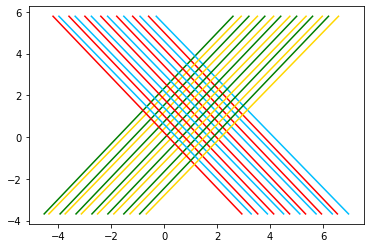

In [3]:
def generateOrbit():
    """
        生成衛星軌道
    """
    # *********************** 秒 為單位 *********************** # 
    RedLine_x = np.zeros([NumberOfOrbit, int(OrbitLength / SatelliteVelocity)])
    GreenLine_x = np.zeros([NumberOfOrbit, int(OrbitLength / SatelliteVelocity)])
    BlueLine_x = np.zeros([NumberOfOrbit, int(OrbitLength / SatelliteVelocity)])
    GlodLine_x = np.zeros([NumberOfOrbit, int(OrbitLength / SatelliteVelocity)])

    # y 軸
    y_start = 5.789051883926725
    y_end = -3.6795707231939776
    y_table = np.linspace(y_start, y_end, int(OrbitLength / SatelliteVelocity))

    # x 軸
    for i in range(NumberOfOrbit):
        RedLine_x[i] = np.linspace(-SatelliteSpace/2*sin37-sin37*i, SatelliteSpace/2*sin37-sin37*i+sin37*((SatellitePerOrbit-1)*SatelliteSpace), int(OrbitLength / SatelliteVelocity))
        GreenLine_x[i] = np.linspace(2+sin37*i+SatelliteSpace/2*sin37, 2+sin37*i-sin37*((SatellitePerOrbit-1)*SatelliteSpace)-SatelliteSpace/2*sin37, int(OrbitLength / SatelliteVelocity))
        BlueLine_x[i] = np.linspace(0.3-SatelliteSpace/2*sin378-sin378*i, 0.3+SatelliteSpace/2*sin378-sin378*i+sin378*((SatellitePerOrbit-1)*SatelliteSpace), int(OrbitLength / SatelliteVelocity))
        GlodLine_x[i] = np.linspace(2.3+sin378*i+SatelliteSpace/2*sin378, 2.3+sin378*i-sin378*((SatellitePerOrbit-1)*SatelliteSpace)-SatelliteSpace/2*sin378, int(OrbitLength / SatelliteVelocity))

    return RedLine_x, GreenLine_x, BlueLine_x, GlodLine_x, y_table

RedLine_x, GreenLine_x, BlueLine_x, GlodLine_x, y_table = generateOrbit()

# 畫線
for i in range(NumberOfOrbit):
    plt.plot([RedLine_x[i][0], RedLine_x[i][-1]], [y_table[0], y_table[-1]], color='r')
    plt.plot([GreenLine_x[i][0], GreenLine_x[i][-1]], [y_table[0], y_table[-1]], color='g')
    plt.plot([BlueLine_x[i][0], BlueLine_x[i][-1]], [y_table[0], y_table[-1]], color='deepskyblue')
    plt.plot([GlodLine_x[i][0], GlodLine_x[i][-1]], [y_table[0], y_table[-1]], color='gold')

In [4]:
All_Center = np.zeros([NumberOfOrbit*SatellitePerOrbit*4, 2]) # 所有衛星的中心位置 # 共有 7 * 6 * 4 個衛星, (x,y)共兩軸

def Inintial_All_Center(All_Center):
    """
        初始化所有衛星的起始點
    """
    Index_RedLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
    Index_GreenLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
    Index_BlueLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
    Index_GlodLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
    for i in range(NumberOfOrbit):
        if i % 2 == 1:
            Index_RedLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6 ), SatellitePerOrbit).astype(int)
            Index_GreenLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int) + int(OrbitLength / SatelliteVelocity / 6 / 2)
            Index_BlueLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int)
            Index_GlodLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int)
        else:
            Index_RedLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int) + int(OrbitLength / SatelliteVelocity / 6 / 2)
            Index_GreenLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int)
            Index_BlueLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int) + int(OrbitLength / SatelliteVelocity / 6 / 2)
            Index_GlodLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int) + int(OrbitLength / SatelliteVelocity / 6 / 2)

    Index_BlueLocation += int(OrbitLength / SatelliteVelocity / 6 / 4)
    Index_GlodLocation += int(OrbitLength / SatelliteVelocity / 6 / 4)

    for i in range(NumberOfOrbit):
        for s in range(SatellitePerOrbit):
            RedCenter_x = RedLine_x[i][int(Index_RedLocation[i][s])]
            RedCenter_y = y_table[int(Index_RedLocation[i][s])]
            GreenCenter_x = GreenLine_x[i][int(Index_GreenLocation[i][s])]
            GreenCenter_y = y_table[int(Index_GreenLocation[i][s])]
            BlueCenter_x = BlueLine_x[i][int(Index_BlueLocation[i][s])]
            BlueCenter_y = y_table[int(Index_BlueLocation[i][s])]
            GlodCenter_x = GlodLine_x[i][int(Index_GlodLocation[i][s])]
            GlodCenter_y = y_table[int(Index_GlodLocation[i][s])]
            All_Center[i * 24 + s * 4] = RedCenter_x, RedCenter_y
            All_Center[i * 24 + s * 4 + 1] = GreenCenter_x, GreenCenter_y
            All_Center[i * 24 + s * 4 + 2] = BlueCenter_x, BlueCenter_y
            All_Center[i * 24 + s * 4 + 3] = GlodCenter_x, GlodCenter_y
            # ------------------------------- plt ------------------------------- 
            plt.scatter(RedCenter_x, RedCenter_y, color='r', s=200)
            circle1 = plt.Circle([RedCenter_x, RedCenter_y], 0.5735, color='k', fill=False, linewidth=1)
            plt.gca().add_patch(circle1)
            
            plt.scatter(GlodCenter_x, GlodCenter_y, color='r', s=200)
            circle1 = plt.Circle([GlodCenter_x, GlodCenter_y], 0.5735, color='k', fill=False, linewidth=1)
            plt.gca().add_patch(circle1)
            
            plt.scatter(GreenCenter_x, GreenCenter_y, color='r', s=200)
            circle1 = plt.Circle([GreenCenter_x, GreenCenter_y], 0.5735, color='k', fill=False, linewidth=1)
            plt.gca().add_patch(circle1)
            
            plt.scatter(BlueCenter_x, BlueCenter_y, color='r', s=200)
            circle1 = plt.Circle([BlueCenter_x, BlueCenter_y], 0.5735, color='k', fill=False, linewidth=1)
            plt.gca().add_patch(circle1)
            # ------------------------------- plt ------------------------------- 
    return All_Center

In [50]:
def Satellites_Centers_at_time(Centers, second):
    """
        衛星在經過 second 秒後，所在的位置
    """
    Index_RedLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
    Index_GreenLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
    Index_BlueLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
    Index_GlodLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
    for i in range(NumberOfOrbit):
        if i % 2 == 1:
            Index_RedLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6 ), SatellitePerOrbit).astype(int)
            Index_GreenLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int) + int(OrbitLength / SatelliteVelocity / 6 / 2)
            Index_BlueLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int)
            Index_GlodLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int)
        else:
            Index_RedLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int) + int(OrbitLength / SatelliteVelocity / 6 / 2)
            Index_GreenLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int)
            Index_BlueLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int) + int(OrbitLength / SatelliteVelocity / 6 / 2)
            Index_GlodLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int) + int(OrbitLength / SatelliteVelocity / 6 / 2)

    Index_BlueLocation += int(OrbitLength / SatelliteVelocity / 6 / 4)
    Index_GlodLocation += int(OrbitLength / SatelliteVelocity / 6 / 4)
    
    Temporary_Centers = copy.deepcopy(Centers)
    for i in range(NumberOfOrbit):
        for s in range(SatellitePerOrbit):
            RedCenter_x = RedLine_x[i][(int(Index_RedLocation[i][s])+second)%1557]
            RedCenter_y = y_table[(int(Index_RedLocation[i][s])+second)%1557]
            GreenCenter_x = GreenLine_x[i][(int(Index_GreenLocation[i][s])-second)%1557]
            GreenCenter_y = y_table[(int(Index_GreenLocation[i][s])-second)%1557]
            BlueCenter_x = BlueLine_x[i][(int(Index_BlueLocation[i][s])+second)%1557]
            BlueCenter_y = y_table[(int(Index_BlueLocation[i][s])+second)%1557]
            GlodCenter_x = GlodLine_x[i][(int(Index_GlodLocation[i][s])-second)%1557]
            GlodCenter_y = y_table[(int(Index_GlodLocation[i][s])-second)%1557]

            Temporary_Centers[i * 24 + s * 4] = RedCenter_x, RedCenter_y
            Temporary_Centers[i * 24 + s * 4 + 1] = GreenCenter_x, GreenCenter_y
            Temporary_Centers[i * 24 + s * 4 + 2] = BlueCenter_x, BlueCenter_y
            Temporary_Centers[i * 24 + s * 4 + 3] = GlodCenter_x, GlodCenter_y
#             # ------------------------------- plt -------------------------------             
#             plt.scatter(RedCenter_x, RedCenter_y, color='y')
#             plt.scatter(GreenCenter_x, GreenCenter_y, color='y')
#             plt.scatter(BlueCenter_x, BlueCenter_y, color='y')
#             plt.scatter(GlodCenter_x, GlodCenter_y, color='y')
#             # ------------------------------- plt ------------------------------- 
    return Temporary_Centers

([<matplotlib.axis.YTick at 0x22fabfd9c18>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

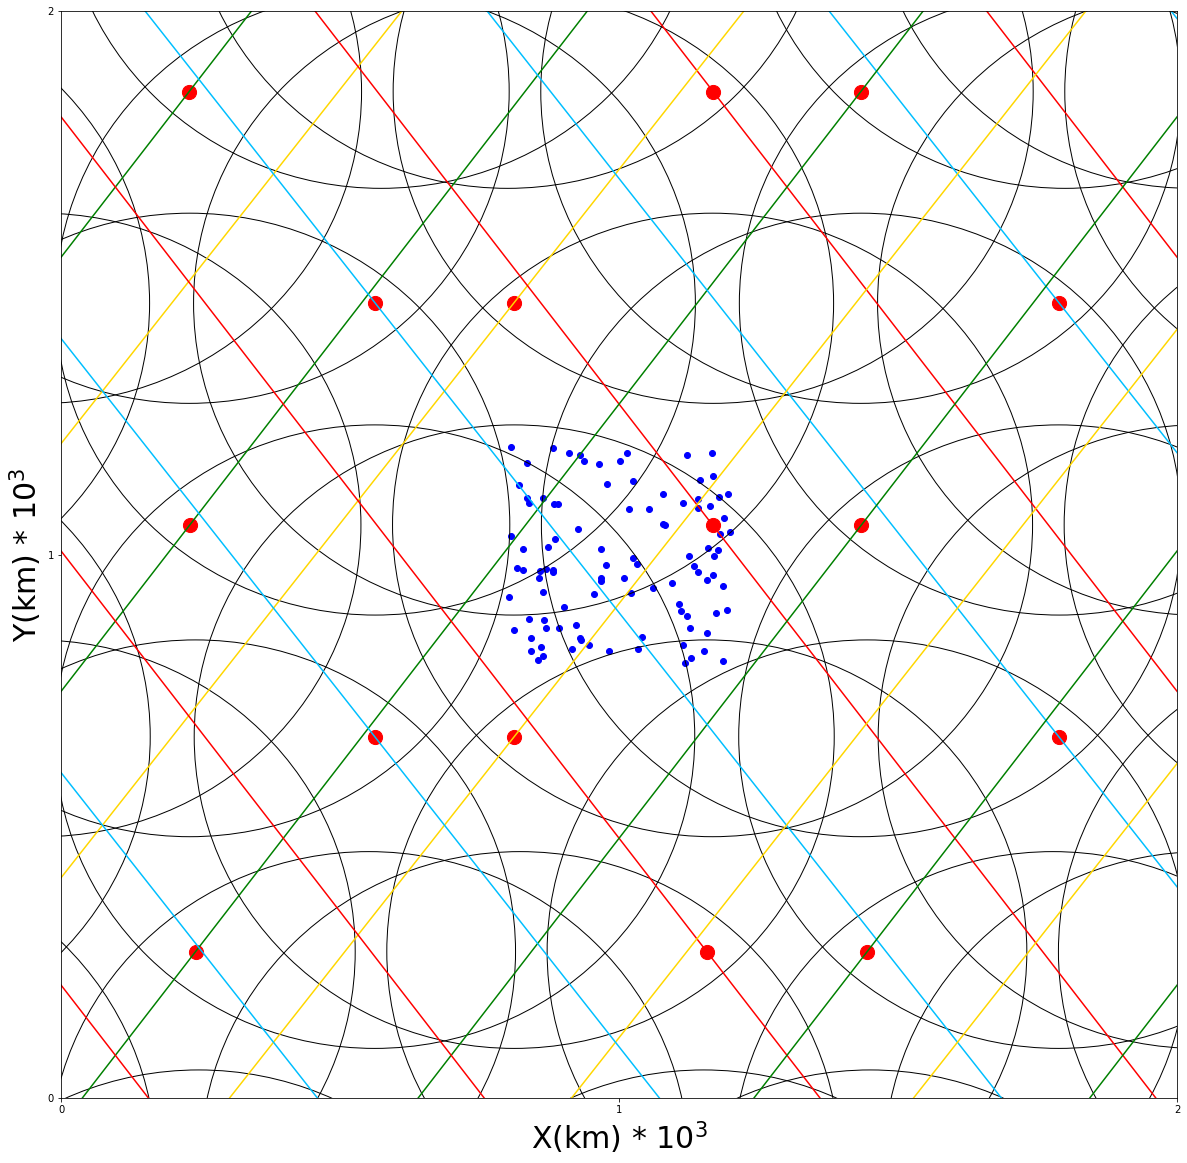

In [6]:
plt.figure(figsize=(20, 20))
# plt.style.use('classic')
plt.xlabel("X(km) * $\mathregular{10^3}$", fontsize=30)
plt.ylabel("Y(km) * $\mathregular{10^3}$", fontsize=30)

# RedLine_x, GreenLine_x, BlueLine_x, GlodLine_x = generateOrbit()
All_Center = np.zeros([NumberOfOrbit*SatellitePerOrbit*4, 2]) # 所有衛星的中心位置 # 共有 7 * 6 * 4 個衛星, (x,y)共兩軸
All_Center = Inintial_All_Center(All_Center)

# 畫線
for i in range(NumberOfOrbit):
    plt.plot([RedLine_x[i][0], RedLine_x[i][-1]], [y_table[0], y_table[-1]], color='r')
    plt.plot([GreenLine_x[i][0], GreenLine_x[i][-1]], [y_table[0], y_table[-1]], color='g')
    plt.plot([BlueLine_x[i][0], BlueLine_x[i][-1]], [y_table[0], y_table[-1]], color='deepskyblue')
    plt.plot([GlodLine_x[i][0], GlodLine_x[i][-1]], [y_table[0], y_table[-1]], color='gold')
    
# Satellites_Centers_at_time(All_Center, 10)

plt.xlim(0,2)
plt.ylim(0,2)

points = []
x = [random.uniform(0.8, 1.2) for _ in range(100)]
y = [random.uniform(0.8, 1.2) for _ in range(100)]
for i in range(len(x)):
    points.append((x[i], y[i]))
for i in range(len(x)):
    plt.scatter(points[i][0], points[i][1], c="b")

linspace = np.linspace(0, 2, 3)
plt.xticks(linspace)
plt.yticks(linspace)

In [7]:
def MultipleMinimaxLocation(points, p=3):
    global centerPoints
    global PointsWhichCluster
    global cluserPoints
    centerPoints = []
    PointsWhichCluster = []
    centerIndex = []
    index = [i for i in range(len(points))] # list 從 0 到 points 數
    centerIndex = random.sample(index, p) # 從中隨機取 p 個點，不重複。 ex.[0, 15, 7]
    # print(centerIndex)
    for i in centerIndex: # 找出 p 個 centres 的位置
        centerPoints.append((points[i][0], points[i][1]))
    #     plt.scatter(points[i][0], points[i][1],s=300, marker='*', c='k')

    for i in range(len(points)): # 每一個點分群到最近的 p_centre
        Dif = []
        for j in range(len(centerPoints)):
            dif = math.sqrt(math.pow(points[i][0] - centerPoints[j][0], 2) + math.pow(points[i][1] - centerPoints[j][1], 2))
            Dif.append(dif)
        PointsWhichCluster.append(Dif.index(min(Dif)))
        
    # 得到每一點分屬於哪一群
    # PointsWhichCluster: [1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 2, 0, 1]
    npPointsWhichCluster = np.array(PointsWhichCluster)
    npPoints = np.array(points)
#     # ----------------------------- 如果某群中的點小於三的話 -----------------------------
#     i = 0
#     while i < p:
#         if(len(np.where(npPointsWhichCluster==i)[0])<3):
#             print('***************************************')
#             centerPoints = []
#             PointsWhichCluster = []
#             index = [_ for _ in range(len(points))] # list 從 0 到 points 數
#             centerIndex = random.sample(index, p) # 從中隨機取 p 個點，不重複。 ex.[0, 15, 7]
#             for _ in centerIndex:
#                 centerPoints.append((points[_][0], points[_][1]))
#             for j in range(len(points)):
#                 Dif = []
#                 for k in range(len(centerPoints)):
#                     dif = math.sqrt(math.pow(points[j][0] - centerPoints[k][0], 2) + math.pow(points[j][1] - centerPoints[k][1], 2))
#                     Dif.append(dif)
#                 PointsWhichCluster.append(Dif.index(min(Dif)))            
#             npPointsWhichCluster = np.array(PointsWhichCluster)
#             npPoints = np.array(points)
#             i = -1
#         i += 1
#     # ----------------------------------------------------------------------------------    
            
    print('npPointsWhichCluster', npPointsWhichCluster)

    Clusters = []
    BindingSets = []
    Radiis = []
    CurrentPoints = []
    for i in range(p):
        cluserPoints = npPoints[np.where(npPointsWhichCluster==i)[0]]
        cluserPoints = list(map(tuple, cluserPoints)) # [(...), (...),...,(...)]
        Clusters.append(cluserPoints)
        bindingSet, radii, currentPoint = SingleMinimaxLocation(cluserPoints)
        BindingSets.append(bindingSet)
        Radiis.append(radii)
        CurrentPoints.append(currentPoint)

    for i in range(len(PointsWhichCluster)):
        if(PointsWhichCluster[i]==0):
            plt.scatter(points[i][0], points[i][1], c="r")
        elif(PointsWhichCluster[i]==1):
            plt.scatter(points[i][0], points[i][1], c="g")
        else:
            plt.scatter(points[i][0], points[i][1], c="b")
            
    return Clusters, BindingSets, Radiis, CurrentPoints, PointsWhichCluster

# MultipleMinimaxLocation(points, 3)

In [8]:
def SingleMinimaxLocation(points):
    bindingSet = []
    if(len(points)>=3):
        sumx = 0
        sumy = 0
        for i, j in points:
            sumx += i
            sumy += j
        x_0 = sumx / len(points)
        y_0 = sumy / len(points)
        point_0 = (x_0, y_0)
#         print(points)
#         print(point_0)
        triplet = initialTriplet(point_0, points)
#         print('triplet:', triplet)
        while True:
            currentPoint, currentRadii = MinimaxTriplet(triplet)
            furthestPoint, furthestDif = findFurthest(points, currentPoint)
            if(abs(furthestDif-currentRadii)>0.0001):
        #         print("%")
                triplet = FourPointFindTriplet(triplet, furthestPoint) # 生成新的 triplet
            else: # 找到了
                print("currenPoint:", currentPoint)
                print("currentRadii:", currentRadii)
                break
        bindingSet = triplet
        # ---------------- plot ----------------
#         fig = plt.figure(figsize=(6,6))
#         plt.scatter(x_0,y_0,c="b")
        for i, j in points:
            plt.scatter(i, j, c="red")
        for i in range(len(triplet)):
            plt.scatter(triplet[i][0], triplet[i][1], c="g")
#         plt.scatter(currentPoint[0], currentPoint[1], c="y")
        circle = Circle(currentPoint, radius=currentRadii, fill=False)
        plt.gca().add_patch(circle)

        plt.xlabel("X")
        plt.ylabel("Y")
        plt.xlim(-5,15)
        plt.ylim(-5,15)
        plt.title("Simple Scatter Plot")
#         plt.show()
        return bindingSet, currentRadii, currentPoint
        
    else:
        if(len(points)==2):
            sumx = 0
            sumy = 0
            for i, j in points:
                sumx += i
                sumy += j
            x_0 = sumx / len(points)
            y_0 = sumy / len(points)
            point_0 = (x_0, y_0)
            currentPoint, currentRadii = twoPointMedian(points[0], points[1])
            
            for _ in range(len(points)):
                bindingSet.append(points[_])
            # ---------------- plot ----------------
#             fig = plt.figure(figsize=(6,6))
#             plt.scatter(x_0,y_0,c="b")
            for i, j in points:
                plt.scatter(i, j, c="red")
#             plt.scatter(currentPoint[0], currentPoint[1], c="y")
            circle = Circle(currentPoint, radius=currentRadii, fill=False)
            plt.gca().add_patch(circle)

            plt.xlabel("X")
            plt.ylabel("Y")
            plt.xlim(-5,15)
            plt.ylim(-5,15)
            plt.title("Simple Scatter Plot")
#             plt.show()
            return bindingSet, currentRadii, currentPoint

#         elif(len(points)==0):
#             return [0, 0, 0

        else: # len(points)==1
            currentPoint = points[0]
            currentRadii = 0.028 # ==========================
            bindingSet.append(points[0])
            # ---------------- plot ----------------
#             fig = plt.figure(figsize=(6,6))
#             plt.scatter(currentPoint[0], currentPoint[1], c="y")
            circle = Circle(currentPoint, radius=currentRadii, fill=False)
            plt.gca().add_patch(circle)

            plt.xlabel("X")
            plt.ylabel("Y")
            plt.xlim(-5,15)
            plt.ylim(-5,15)
            plt.title("Simple Scatter Plot")
#             plt.show()
            return bindingSet, currentRadii, currentPoint

In [9]:
def calculateDistance2p(p1, p2):
    """給定兩點，回傳兩點距離"""
    dif = math.sqrt(math.pow(p1[0]-p2[0], 2) + math.pow(p1[1]-p2[1], 2))
    return dif

In [10]:
def findFurthest(points, p2):
    """給點集合和一點，回傳點集合中距離一點最遠的點"""
    Dif = []
    for i in range(len(points)):
        Dif.append(calculateDistance2p(points[i], p2))
    point = points[Dif.index(max(Dif))]
    maxDif = max(Dif)
    return point, maxDif

In [11]:
def twoPointMedian(p1, p2):
    """給定兩點，回傳其中點及半徑"""
    midx = (p1[0] + p2[0]) / 2
    midy = (p1[1] + p2[1]) / 2
    dif = math.sqrt(math.pow(p1[0]-p2[0], 2) + math.pow(p1[1]-p2[1], 2))
    radius = dif / 2
    return (midx, midy), radius

In [12]:
def initialTriplet(point0, points):
    triplet = []
    Dis = []
    for i in range(len(points)):
        dis = math.sqrt(math.pow(point0[0] - points[i][0], 2) + math.pow(point0[1] - points[i][1], 2))
        Dis.append(dis)
    SortedDis = sorted(Dis, reverse=True)
    for i in range(3):
        triplet.append((points[Dis.index(SortedDis[i])][0], points[Dis.index(SortedDis[i])][1]))
    return triplet

In [13]:
def MinimaxTriplet(triplet):
    """找出 triplet 中的 minimax location"""
    for i in range(3):
        currentPoint, currentRadii = twoPointMedian(triplet[i%3], triplet[(i+1)%3])
        dif = math.sqrt(math.pow(currentPoint[0]-triplet[(i+2)%3][0] ,2) + math.pow(currentPoint[1]-triplet[(i+2)%3][1] ,2))
        if(dif<=currentRadii):
            return currentPoint, currentRadii
    return get_circle(triplet[0], triplet[1], triplet[2])

In [14]:
def get_circle(p1,p2,p3):
    '''三点求圆，返回圆心和半径'''
    x, y, z = p1[0]+p1[1]*1j, p2[0]+p2[1]*1j, p3[0]+p3[1]*1j
    w = z-x
    w /= y-x
    c = (x-y)*(w-abs(w)**2)/2j/w.imag-x 
    return (-c.real,-c.imag),abs(c+x)

In [15]:
def FourPointFindTriplet(triplet, p):
    if p in triplet:
        return triplet
    radiiList = []
    fourPoints = list.copy(triplet)
    fourPoints.append(p)
    for i in range(4):
        _ = list.copy(fourPoints)
        _.pop(i)
        currentPoint, currentRadii = MinimaxTriplet(_)
        radiiList.append(currentRadii)
#     fourPoints.pop(radiiList.index(max(radiiList)))
#     random.sample(fourPoints, k = 3)
    return random.sample(fourPoints, k = 3)

In [16]:
def MultipleMinimaxLocation(points, p=3):
    global centerPoints
    global PointsWhichCluster
    global cluserPoints
    centerPoints = []
    PointsWhichCluster = []
    centerIndex = []
    index = [i for i in range(len(points))] # list 從 0 到 points 數
    centerIndex = random.sample(index, p) # 從中隨機取 p 個點，不重複。 ex.[0, 15, 7]
    # print(centerIndex)
    for i in centerIndex: # 找出 p 個 centres 的位置
        centerPoints.append((points[i][0], points[i][1]))
    #     plt.scatter(points[i][0], points[i][1],s=300, marker='*', c='k')

    for i in range(len(points)): # 每一個點分群到最近的 p_centre
        Dif = []
        for j in range(len(centerPoints)):
            dif = math.sqrt(math.pow(points[i][0] - centerPoints[j][0], 2) + math.pow(points[i][1] - centerPoints[j][1], 2))
            Dif.append(dif)
        PointsWhichCluster.append(Dif.index(min(Dif)))
        
    # 得到每一點分屬於哪一群
    # PointsWhichCluster: [1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 2, 0, 1]
    npPointsWhichCluster = np.array(PointsWhichCluster)
    npPoints = np.array(points)
    print('npPointsWhichCluster', npPointsWhichCluster)

    Clusters = []
    BindingSets = []
    Radiis = []
    CurrentPoints = []
    for i in range(p):
        cluserPoints = npPoints[np.where(npPointsWhichCluster==i)[0]]
        cluserPoints = list(map(tuple, cluserPoints)) # [(...), (...),...,(...)]
        Clusters.append(cluserPoints)
        bindingSet, radii, currentPoint = SingleMinimaxLocation(cluserPoints)
        BindingSets.append(bindingSet)
        Radiis.append(radii)
        CurrentPoints.append(currentPoint)

    for i in range(len(PointsWhichCluster)):
        if(PointsWhichCluster[i]==0):
            plt.scatter(points[i][0], points[i][1], c="r")
        elif(PointsWhichCluster[i]==1):
            plt.scatter(points[i][0], points[i][1], c="g")
        else:
            plt.scatter(points[i][0], points[i][1], c="b")
            
    return Clusters, BindingSets, Radiis, CurrentPoints, PointsWhichCluster

In [17]:
def rearrangement(points, Clusters, BindingSets, Radiis, PointsWhichCluster):
    bindingsetIndex = []
    try_PointsWhichCluster = PointsWhichCluster.copy()
    tmp_Radiis = sorted(Radiis)
    index = [ _ for _ in range(len(Clusters))]
    index.remove(Radiis.index(tmp_Radiis[-1])) # -1 為 max, -2 為 第二大
    tmp_bindingset = BindingSets[Radiis.index(tmp_Radiis[-1])]

    for i in tmp_bindingset:
        bindingsetIndex.append(points.index(i))

# #     # ------------------------------------- 找最大圓 -------------------------------------
#     a = 0
#     while a < 10:
#         index = [ _ for _ in range(len(BindingSets))]
#         bindingsetIndex = []
#         tmp_Radiis = sorted(Radiis)
#         index.remove(Radiis.index(tmp_Radiis[-1])) # -1 為 max, -2 為 第二大
#         tmp_bindingset = BindingSets[Radiis.index(tmp_Radiis[-1])]
#         for i in tmp_bindingset:
#             bindingsetIndex.append(points.index(i))
#         print('bindingsetIndex:', bindingsetIndex)
#         for i in bindingsetIndex:
#             for j in index:
#                 try_PointsWhichCluster = PointsWhichCluster.copy()
#                 try_PointsWhichCluster[i] = j
#                 npPointsWhichCluster = np.array(try_PointsWhichCluster)
#                 npPoints = np.array(points)
#                 print('    PointsWhichCluster:', PointsWhichCluster)
#                 print('try_PointsWhichCluster:', try_PointsWhichCluster)
#                 print('    PointsWhichCluster:', PointsWhichCluster[i])
#                 print('try_PointsWhichCluster:', try_PointsWhichCluster[i])
#             #         print(Radiis[PointsWhichCluster[i]], Radiis[try_PointsWhichCluster[i]])
#                 print(Radiis)
#                 print(try_PointsWhichCluster[i])
#                 print(max(Radiis[PointsWhichCluster[i]], Radiis[try_PointsWhichCluster[i]]))
#                 setjIndex = PointsWhichCluster[i]
#                 setkIndex = try_PointsWhichCluster[i]
#                 setjPoints = npPoints[np.where(npPointsWhichCluster==setjIndex)[0]]
#                 setjPoints = list(map(tuple, setjPoints))
#                 setkPoints = npPoints[np.where(npPointsWhichCluster==setkIndex)[0]]
#                 setkPoints = list(map(tuple, setkPoints))
#                 print('setjPoints', setjPoints)
#                 if(len(setjPoints)==0 or len(setkPoints)==0):
#                     continue
#                 bindingSetj, setjRadii, _ = SingleMinimaxLocation(setjPoints)
#                 bindingSetk, setkRadii, _ = SingleMinimaxLocation(setkPoints)
#             #         print(setjRadii, setkRadii)
#                 print('before', Radiis[PointsWhichCluster[i]], Radiis[try_PointsWhichCluster[i]])
#                 print('after', setjRadii, setkRadii)
#                 if(max(setjRadii, setkRadii) < max(Radiis[setjIndex], Radiis[setkIndex])):
#                     PointsWhichCluster = try_PointsWhichCluster
#                     Radiis[setjIndex] = setjRadii
#                     Radiis[setkIndex] = setkRadii
#                     BindingSets[setjIndex] = bindingSetj
#                     BindingSets[setkIndex] = bindingSetk
#                     print('After rearrangement **************************************')
#                     print('    PointsWhichCluster:', PointsWhichCluster)
#                     print('try_PointsWhichCluster:', try_PointsWhichCluster)
#                     print(' *********************************************************')
#                     Clusters = []
#                     npPointsWhichCluster = np.array(PointsWhichCluster)
#                     npPoints = np.array(points)
#                     for i in range(len(BindingSets)):
#                         cluserPoints = npPoints[np.where(npPointsWhichCluster==i)[0]]
#                         cluserPoints = list(map(tuple, cluserPoints)) # [(...), (...),...,(...)]
#                         Clusters.append(cluserPoints)
#                     a = 0
#         a += 1
# #    # ------------------------------------- 找最大圓 -------------------------------------

    # ------------------------------------- 全迭代 ---------------------------------------  
    for t in range(len(BindingSets)-1):
        a = 0
        while a < 3:
            index = [ _ for _ in range(len(BindingSets))]
            bindingsetIndex = []
            tmp_Radiis = sorted(Radiis)
            index.remove(Radiis.index(tmp_Radiis[-t-1])) # -1 為 max, -2 為 第二大
            tmp_bindingset = BindingSets[Radiis.index(tmp_Radiis[-t-1])]
            for i in tmp_bindingset:
                bindingsetIndex.append(points.index(i))
            print('bindingsetIndex:', bindingsetIndex)
            for i in bindingsetIndex:
                for j in index:
                    try_PointsWhichCluster = PointsWhichCluster.copy()
                    try_PointsWhichCluster[i] = j
                    npPointsWhichCluster = np.array(try_PointsWhichCluster)
                    npPoints = np.array(points)
#                     print('    PointsWhichCluster:', PointsWhichCluster)
#                     print('try_PointsWhichCluster:', try_PointsWhichCluster)
#                     print('    PointsWhichCluster:', PointsWhichCluster[i])
#                     print('try_PointsWhichCluster:', try_PointsWhichCluster[i])
            #         print(Radiis[PointsWhichCluster[i]], Radiis[try_PointsWhichCluster[i]])
#                     print(Radiis)
#                     print(try_PointsWhichCluster[i])
#                     print(max(Radiis[PointsWhichCluster[i]], Radiis[try_PointsWhichCluster[i]]))
                    setjIndex = PointsWhichCluster[i]
                    setkIndex = try_PointsWhichCluster[i]
                    setjPoints = npPoints[np.where(npPointsWhichCluster==setjIndex)[0]]
                    setjPoints = list(map(tuple, setjPoints))
                    setkPoints = npPoints[np.where(npPointsWhichCluster==setkIndex)[0]]
                    setkPoints = list(map(tuple, setkPoints))
#                     print('setjPoints', setjPoints)
                    if(len(setjPoints)==0 or len(setkPoints)==0):
                        continue
                    bindingSetj, setjRadii, _ = SingleMinimaxLocation(setjPoints)
                    bindingSetk, setkRadii, _ = SingleMinimaxLocation(setkPoints)
            #         print(setjRadii, setkRadii)
#                     print('before', Radiis[PointsWhichCluster[i]], Radiis[try_PointsWhichCluster[i]])
#                     print('after', setjRadii, setkRadii)
                    if(max(setjRadii, setkRadii) < max(Radiis[setjIndex], Radiis[setkIndex])):
                        PointsWhichCluster = try_PointsWhichCluster
                        Radiis[setjIndex] = setjRadii
                        Radiis[setkIndex] = setkRadii
                        BindingSets[setjIndex] = bindingSetj
                        BindingSets[setkIndex] = bindingSetk
                        print('After rearrangement **************************************')
                        print('    PointsWhichCluster:', PointsWhichCluster)
                        print('try_PointsWhichCluster:', try_PointsWhichCluster)
                        print(' *********************************************************')
                        Clusters = []
                        npPointsWhichCluster = np.array(PointsWhichCluster)
                        npPoints = np.array(points)
                        for i in range(len(BindingSets)):
                            cluserPoints = npPoints[np.where(npPointsWhichCluster==i)[0]]
                            cluserPoints = list(map(tuple, cluserPoints)) # [(...), (...),...,(...)]
                            Clusters.append(cluserPoints)
                        a = 0
            a += 1
    # ------------------------------------- 全迭代 ---------------------------------------
    plt.clf()
    npPointsWhichCluster = np.array(PointsWhichCluster)
    npPoints = np.array(points)
    Clusters = []
    CurrentPoints = [] # cluster 的中心
    
    for i in range(len(BindingSets)):
        cluserPoints = npPoints[np.where(npPointsWhichCluster==i)[0]]
        cluserPoints = list(map(tuple, cluserPoints)) # [(...), (...),...,(...)]
        Clusters.append(cluserPoints)
        bindingSet, radii, currentPoint = SingleMinimaxLocation(cluserPoints)
        CurrentPoints.append(currentPoint)

    for i in range(len(PointsWhichCluster)):
        if(PointsWhichCluster[i]==0):
            plt.scatter(points[i][0], points[i][1], c="r")
        elif(PointsWhichCluster[i]==1):
            plt.scatter(points[i][0], points[i][1], c="g")
        else:
            plt.scatter(points[i][0], points[i][1], c="b")
            
#     print(points, Clusters, BindingSets, Radiis, PointsWhichCluster)
    return points, Clusters, BindingSets, Radiis, PointsWhichCluster, CurrentPoints

In [18]:
# points = []
# x = [random.uniform(0.8, 1.2) for _ in range(100)]
# y = [random.uniform(0.8, 1.2) for _ in range(100)]
# for i in range(len(x)):
#     points.append((x[i], y[i]))

In [19]:
# fig = plt.figure(figsize=(6,6))
# Clusters, BindingSets, Radiis, CurrentPoints, PointsWhichCluster = MultipleMinimaxLocation(points, 19)
# plt.xlim(0.8,1.2)
# plt.ylim(0.8,1.2)

In [20]:
# plt.figure(figsize=(6,6))
# points, Clusters, BindingSets, Radiis, PointsWhichCluster, CurrentPoints = rearrangement(points, Clusters, BindingSets, Radiis, PointsWhichCluster)
# plt.xlim(0.8,1.2)
# plt.ylim(0.8,1.2)

npPointsWhichCluster [15 16  4  4 15  0  0  8 10 16  2 14 11  9 16 10  5 15  5  8  9  3 11 17
 10  6 12  6 15  8  2  9 11  2 14  2 12 14  2 12  8  4 13  2 16  2 15 16
  3  1 11 11  0  0  7  7 15  2  4 10 16  7  8  9 10 10  2  9  1 15 11 13
 11  2 18 16 15  4  8  3 16 13 14 14  0  1 11 16  7  8 17 17 17  0 17  1
  0  9  4  1]
currenPoint: (0.8251657153019566, 0.9551255570717145)
currentRadii: 0.046151473312149104
currenPoint: (1.0672308054243356, 0.9532303870874903)
currentRadii: 0.033197619230187436
currenPoint: (0.9775964466457441, 1.1283119079662312)
currentRadii: 0.06997548176629097
currenPoint: (1.0628952839761356, 1.0249162670816387)
currentRadii: 0.04018349407633694
currenPoint: (1.1078403406715793, 1.1756374653199113)
currentRadii: 0.038824462086161506
currenPoint: (0.9865871261613347, 0.8771097610402477)
currentRadii: 0.020842096651839195
currenPoint: (1.1880287183114318, 0.9267147808078491)
currentRadii: 0.08287524258120713
currenPoint: (0.8788595579073275, 1.0376616814807538)

currenPoint: (1.0845720574656759, 0.9595051809084414)
currentRadii: 0.16744914283288098
currenPoint: (1.1819213883178845, 0.9452311349685184)
currentRadii: 0.04522743980477857
currenPoint: (1.0053418114876291, 0.9285905379617291)
currentRadii: 0.20374660459775645
currenPoint: (1.1819213883178845, 0.9452311349685184)
currentRadii: 0.04522743980477857
currenPoint: (1.1170601482988873, 0.9130273824446187)
currentRadii: 0.0968410620613262
currenPoint: (1.1819213883178845, 0.9452311349685184)
currentRadii: 0.04522743980477857
currenPoint: (1.0837247340090812, 1.0208783315976684)
currentRadii: 0.1986155150894039
currenPoint: (1.1819213883178845, 0.9452311349685184)
currentRadii: 0.04522743980477857
currenPoint: (1.1123022060408077, 0.9513803968302206)
currentRadii: 0.1261382725222605
currenPoint: (1.1819213883178845, 0.9452311349685184)
currentRadii: 0.04522743980477857
currenPoint: (1.1631253819164007, 1.0248198880187356)
currentRadii: 0.1708956803157944
currenPoint: (1.1819213883178845, 0.

currenPoint: (1.0614469380129197, 0.8180902075748329)
currentRadii: 0.08725239091114785
currenPoint: (1.1363748558512716, 0.8665769128062244)
currentRadii: 0.05558993760658613
currenPoint: (1.050337131080029, 0.8784623653956909)
currentRadii: 0.12262839994905653
currenPoint: (1.1363748558512716, 0.8665769128062244)
currentRadii: 0.05558993760658613
currenPoint: (1.0616149679894007, 0.8492727835340647)
currentRadii: 0.09724980706153749
currenPoint: (1.1363748558512716, 0.8665769128062244)
currentRadii: 0.05558993760658613
currenPoint: (1.169319534057939, 0.8965749668905365)
currentRadii: 0.0954615522831443
currenPoint: (1.1363748558512716, 0.8665769128062244)
currentRadii: 0.05558993760658613
currenPoint: (1.0190867217574158, 0.9421088249009381)
currentRadii: 0.1888431885741488
currenPoint: (1.1363748558512716, 0.8665769128062244)
currentRadii: 0.05558993760658613
currenPoint: (1.0559510532181244, 0.9272018729206097)
currentRadii: 0.15377695287636167
currenPoint: (1.1363748558512716, 0.

currenPoint: (1.0067900630575917, 0.8729321103634029)
currentRadii: 0.051156802606117394
currenPoint: (1.075123010501149, 0.9988894681178984)
currentRadii: 0.19395213959379776
currenPoint: (1.0821760912651601, 0.9210617744973579)
currentRadii: 0.13869986601473067
currenPoint: (0.8926080880240579, 0.852598752304748)
currentRadii: 0.08518665905927024
currenPoint: (0.9035508878439529, 1.0153094359430614)
currentRadii: 0.19638564691151714
currenPoint: (1.0845720574656759, 0.9595051809084414)
currentRadii: 0.16744914283288098
bindingsetIndex: [0, 46, 76]
currenPoint: (0.8926199825679055, 0.9010688671464451)
currentRadii: 0.03734375980578907
currenPoint: (0.8113777375236628, 0.9204865712448087)
currentRadii: 0.0796112576162896
currenPoint: (0.8926199825679055, 0.9010688671464451)
currentRadii: 0.03734375980578907
currenPoint: (0.9523580467162037, 0.8892448030687428)
currentRadii: 0.1520144209875288
currenPoint: (0.8926199825679055, 0.9010688671464451)
currentRadii: 0.03734375980578917
curren

currenPoint: (1.0602753404527476, 0.8785720337402805)
currentRadii: 0.13755510101495527
currenPoint: (1.1819213883178845, 0.9452311349685184)
currentRadii: 0.04522743980477857
currenPoint: (1.0746655011917665, 0.9052143804978381)
currentRadii: 0.13065003189209243
currenPoint: (1.1819213883178845, 0.9452311349685184)
currentRadii: 0.04522743980477857
currenPoint: (1.0859433381011385, 0.8760247986362119)
currentRadii: 0.11181345545880607
currenPoint: (1.1819213883178845, 0.9452311349685184)
currentRadii: 0.04522743980477857
currenPoint: (1.0321809701729383, 0.9535015969546441)
currentRadii: 0.19018614309149726
currenPoint: (1.1819213883178845, 0.9452311349685184)
currentRadii: 0.04522743980477857
currenPoint: (1.1375128705816402, 0.8615955790318363)
currentRadii: 0.05880718858702444
After rearrangement **************************************
    PointsWhichCluster: [15, 16, 4, 4, 15, 0, 0, 14, 10, 16, 3, 14, 11, 9, 16, 1, 5, 15, 5, 10, 9, 3, 11, 17, 10, 6, 12, 6, 15, 10, 2, 9, 11, 2, 14, 

currenPoint: (0.9453274652145027, 1.0351298714536699)
currentRadii: 0.09563302879562466
currenPoint: (0.9935006178754822, 1.1354566600677454)
currentRadii: 0.061433081443976176
currenPoint: (0.9529223033448668, 0.99127511075742)
currentRadii: 0.139799981095906
currenPoint: (0.9935006178754822, 1.1354566600677454)
currentRadii: 0.061433081443976176
currenPoint: (1.0439129686439788, 1.0134116710362722)
currentRadii: 0.1709748733532353
currenPoint: (0.9935006178754822, 1.1354566600677454)
currentRadii: 0.061433081443976176
currenPoint: (0.8850594867441739, 1.063625476489438)
currentRadii: 0.06912579620117254
currenPoint: (0.9935006178754822, 1.1354566600677454)
currentRadii: 0.061433081443976176
currenPoint: (1.0313111143840332, 0.9647555029582903)
currentRadii: 0.19863604213116667
currenPoint: (0.9935006178754822, 1.1354566600677454)
currentRadii: 0.061433081443976176
currenPoint: (0.9463488640462185, 1.043705764025576)
currentRadii: 0.08789547831459464
currenPoint: (0.9935006178754822, 

currenPoint: (0.9330389364390892, 0.9565572975372736)
currentRadii: 0.13105344468838653
currenPoint: (1.0857753081246573, 0.8448422226769801)
currentRadii: 0.111059771495937
currenPoint: (0.9699032678997979, 0.9416503455569454)
currentRadii: 0.10924998976753489
currenPoint: (1.0067900630575917, 0.8729321103634029)
currentRadii: 0.051156802606117394
currenPoint: (1.075123010501149, 0.9988894681178984)
currentRadii: 0.19395213959379776
currenPoint: (1.0821760912651601, 0.9210617744973579)
currentRadii: 0.13869986601473067
currenPoint: (0.8918112341606911, 0.8367382559600596)
currentRadii: 0.0836933483695145
currenPoint: (0.9035508878439529, 1.0153094359430614)
currentRadii: 0.19638564691151714
currenPoint: (1.0845720574656759, 0.9595051809084414)
currentRadii: 0.16744914283288098
currenPoint: (0.9554670085936003, 0.9647984035740549)
currentRadii: 0.1472451555261181
currenPoint: (1.0684803369871854, 0.9480851997536772)
currentRadii: 0.0631155964438672
currenPoint: (1.0444933385003572, 1.1

currenPoint: (1.0974704624079803, 1.0853107552860233)
currentRadii: 0.034503981602858204
currenPoint: (1.061896472012482, 0.9810671762606786)
currentRadii: 0.09185565008742248
currenPoint: (1.0974704624079803, 1.0853107552860233)
currentRadii: 0.034503981602858204
currenPoint: (1.0379094735256538, 1.1335216456560393)
currentRadii: 0.07843472045361274
currenPoint: (1.0974704624079803, 1.0853107552860233)
currentRadii: 0.034503981602858204
currenPoint: (1.067485755511135, 1.0325547222117883)
currentRadii: 0.04115983019731679
currenPoint: (1.0974704624079803, 1.0853107552860233)
currentRadii: 0.034503981602858204
currenPoint: (1.1130042482521127, 1.1322830517639766)
currentRadii: 0.0684691763652012
currenPoint: (1.0974704624079803, 1.0853107552860233)
currentRadii: 0.034503981602858204
currenPoint: (1.0405510791981152, 0.9367286889157131)
currentRadii: 0.1404002933130078
currenPoint: (1.0974704624079803, 1.0853107552860233)
currentRadii: 0.034503981602858204
currenPoint: (1.01867471415239

currenPoint: (0.8918112341606911, 0.8367382559600596)
currentRadii: 0.0836933483695145
currenPoint: (0.9035508878439529, 1.0153094359430614)
currentRadii: 0.19638564691151714
currenPoint: (1.0392461297066653, 0.970223505612396)
currentRadii: 0.15176807180479895
currenPoint: (1.0040673111323402, 1.1483386842337866)
currentRadii: 0.0500870138245981
currenPoint: (0.9195565045128797, 1.0044063226864586)
currentRadii: 0.1321847733285042
currenPoint: (1.0040673111323402, 1.1483386842337866)
currentRadii: 0.0500870138245981
currenPoint: (1.0325698329064648, 0.9876931188660809)
currentRadii: 0.09599968030896242
currenPoint: (1.0040673111323402, 1.1483386842337866)
currentRadii: 0.0500870138245981
currenPoint: (1.061427115344657, 1.0438254247580314)
currentRadii: 0.05346355356451874
After rearrangement **************************************
    PointsWhichCluster: [15, 16, 4, 4, 15, 0, 0, 14, 10, 16, 2, 14, 11, 9, 16, 1, 5, 15, 5, 10, 9, 3, 11, 17, 10, 6, 12, 6, 15, 10, 3, 9, 11, 2, 14, 16, 12,

currenPoint: (0.8656761335037289, 1.148239111887309)
currentRadii: 0.060318592911305625
currenPoint: (0.9040846112406781, 0.9805567779522564)
currentRadii: 0.20012293828175312
currenPoint: (0.8656761335037289, 1.148239111887309)
currentRadii: 0.060318592911305625
currenPoint: (0.8678180854559352, 1.028917969535243)
currentRadii: 0.14078957730176092
currenPoint: (0.8656761335037289, 1.148239111887309)
currentRadii: 0.060318592911305625
currenPoint: (0.9009770274070052, 1.0072592936347369)
currentRadii: 0.17529152365132242
currenPoint: (0.8656761335037289, 1.148239111887309)
currentRadii: 0.060318592911305625
currenPoint: (0.9963354831983826, 1.035541782339461)
currentRadii: 0.22185071934898404
currenPoint: (0.8656761335037289, 1.148239111887309)
currentRadii: 0.060318592911305625
currenPoint: (0.8509087121423925, 1.0762790732595686)
currentRadii: 0.09069535657758991
currenPoint: (0.8656761335037289, 1.148239111887309)
currentRadii: 0.060318592911305625
currenPoint: (0.9939238574192966, 

bindingsetIndex: [19, 64, 8]
currenPoint: (1.1325309351153592, 0.8579987636862396)
currentRadii: 0.0563790877192316
currenPoint: (1.0053418114876291, 0.9285905379617291)
currentRadii: 0.20374660459775645
currenPoint: (1.1325309351153592, 0.8579987636862396)
currentRadii: 0.0563790877192316
currenPoint: (1.1170601482988873, 0.9130273824446187)
currentRadii: 0.0968410620613262
currenPoint: (1.1325309351153592, 0.8579987636862396)
currentRadii: 0.0563790877192316
currenPoint: (1.0939002605650292, 1.0270037988976197)
currentRadii: 0.19826008207376405
currenPoint: (1.1325309351153592, 0.8579987636862396)
currentRadii: 0.0563790877192316
currenPoint: (1.110834037409329, 0.9702895545066134)
currentRadii: 0.141705964149994
currenPoint: (1.1325309351153592, 0.8579987636862396)
currentRadii: 0.0563790877192316
currenPoint: (1.1631253819164007, 1.0248198880187356)
currentRadii: 0.1708956803157944
currenPoint: (1.1325309351153592, 0.8579987636862396)
currentRadii: 0.0563790877192316
currenPoint: (

bindingsetIndex: [43, 32, 12]
currenPoint: (0.9712644881585073, 1.0061928066072159)
currentRadii: 0.04509361220005981
currenPoint: (0.9044742879687253, 0.9997153944927621)
currentRadii: 0.11740803060062541
currenPoint: (0.9712644881585073, 1.0061928066072159)
currentRadii: 0.04509361220005966
currenPoint: (1.0404987415455174, 0.9816803101316703)
currentRadii: 0.10281364982039168
currenPoint: (0.9712644881585073, 1.0061928066072159)
currentRadii: 0.04509361220005975
currenPoint: (0.9935006178754822, 1.1354566600677454)
currentRadii: 0.061433081443976176
currenPoint: (0.9712644881585073, 1.0061928066072159)
currentRadii: 0.04509361220005975
currenPoint: (1.0463448988005026, 1.0391344965643352)
currentRadii: 0.061801729842648
currenPoint: (0.9712644881585073, 1.0061928066072159)
currentRadii: 0.04509361220005975
currenPoint: (1.068595392601941, 1.1342180661756824)
currentRadii: 0.09478705423778386
currenPoint: (0.9712644881585073, 1.0061928066072159)
currentRadii: 0.04509361220005975
curr

currenPoint: (1.0766802064703649, 1.0301734398431348)
currentRadii: 0.11414497853478058
currenPoint: (0.9869635470526028, 1.0226851755305162)
currentRadii: 0.05204677834143452
currenPoint: (0.8863153493658958, 0.9458499213058366)
currentRadii: 0.13078574951841948
currenPoint: (0.9869635470526028, 1.0226851755305162)
currentRadii: 0.05204677834143452
currenPoint: (0.8980550030491576, 1.1244211012888385)
currentRadii: 0.09913778258356054
currenPoint: (0.9869635470526028, 1.0226851755305162)
currentRadii: 0.05204677834143452
currenPoint: (1.0468127107052752, 1.0612796055510723)
currentRadii: 0.08307380943531614
currenPoint: (0.9869635470526028, 1.0226851755305162)
currentRadii: 0.05204677834143452
bindingsetIndex: [9, 35, 1]
currenPoint: (0.8690968925515458, 1.1569859711788353)
currentRadii: 0.055561374658817234
currenPoint: (0.8235181123722366, 1.0340267200477398)
currentRadii: 0.12441852736678254
currenPoint: (0.8690968925515458, 1.1569859711788353)
currentRadii: 0.055561374658817254
cu

currenPoint: (0.8658227588413919, 1.150434626028385)
currentRadii: 0.05508552174198563
bindingsetIndex: [9, 35, 1]
currenPoint: (0.8690968925515458, 1.1569859711788353)
currentRadii: 0.055561374658817234
currenPoint: (0.8235181123722366, 1.0340267200477398)
currentRadii: 0.12441852736678254
currenPoint: (0.8690968925515458, 1.1569859711788353)
currentRadii: 0.055561374658817296
currenPoint: (0.948441129238252, 1.0235733847565076)
currentRadii: 0.19196842235633116
currenPoint: (0.8690968925515458, 1.1569859711788353)
currentRadii: 0.055561374658817296
currenPoint: (0.92931067518498, 1.1405149842501132)
currentRadii: 0.11933766390853866
currenPoint: (0.8690968925515458, 1.1569859711788353)
currentRadii: 0.055561374658817296
currenPoint: (0.9542872864932372, 1.0810275711891724)
currentRadii: 0.1623674349147632
currenPoint: (0.8690968925515458, 1.1569859711788353)
currentRadii: 0.055561374658817254
currenPoint: (0.9765377802946755, 1.1761111408005198)
currentRadii: 0.16630779978618163
curr

bindingsetIndex: [75, 45, 31]
currenPoint: (0.8878944804578874, 1.0424232845420507)
currentRadii: 0.05421753120947385
currenPoint: (0.8677244575987608, 1.004306917731213)
currentRadii: 0.09935972690559211
currenPoint: (0.8878944804578874, 1.0424232845420507)
currentRadii: 0.05421753120947385
currenPoint: (0.9926474744647762, 0.9938535824399808)
currentRadii: 0.13992190115621733
currenPoint: (0.8878944804578874, 1.0424232845420507)
currentRadii: 0.05421753120947385
currenPoint: (0.9713680328093611, 1.1235997441279044)
currentRadii: 0.07601745576205626
currenPoint: (0.8878944804578874, 1.0424232845420507)
currentRadii: 0.05421753120947385
currenPoint: (0.9984936317197612, 1.0513077688726455)
currentRadii: 0.10948802124587814
currenPoint: (0.8878944804578874, 1.0424232845420507)
currentRadii: 0.05421753120947385
currenPoint: (1.0207441255211998, 1.146391338483993)
currentRadii: 0.13025832376152613
currenPoint: (0.8878944804578874, 1.0424232845420507)
currentRadii: 0.05421753120947385
curr

currenPoint: (0.950260048907274, 0.9450916909693128)
currentRadii: 0.1464269829727383
currenPoint: (0.85446518283857, 0.9546672746439516)
currentRadii: 0.05027964761595681
currenPoint: (0.9190918079668454, 1.0840496848707308)
currentRadii: 0.1341310372653283
currenPoint: (0.85446518283857, 0.9546672746439516)
currentRadii: 0.05027964761595684
currenPoint: (0.9559348894229571, 1.0021264082131471)
currentRadii: 0.14141819098195807
currenPoint: (0.85446518283857, 0.9546672746439516)
currentRadii: 0.05027964761595683
currenPoint: (0.9781853832243955, 1.0972099778244946)
currentRadii: 0.1903294343407629
currenPoint: (0.85446518283857, 0.9546672746439516)
currentRadii: 0.05027964761595681
currenPoint: (0.9057322141703981, 0.9016556149762311)
currentRadii: 0.1341492248689905
currenPoint: (0.85446518283857, 0.9546672746439516)
currentRadii: 0.05027964761595683
currenPoint: (0.895029792206361, 0.9722128913549615)
currentRadii: 0.0851701585464139
currenPoint: (0.85446518283857, 0.954667274643951

currenPoint: (0.9025777922735243, 0.8221068754403733)
currentRadii: 0.09621523879962247
currenPoint: (0.8852212882009277, 0.8851260056793278)
currentRadii: 0.02100161610273295
currenPoint: (0.8928967691412031, 0.9012400443910098)
currentRadii: 0.10395167427420253
currenPoint: (0.8852212882009277, 0.8851260056793278)
currentRadii: 0.021001616102732913
currenPoint: (0.903817815494251, 0.8672382274994416)
currentRadii: 0.0991464534093209
currenPoint: (0.8852212882009277, 0.8851260056793278)
currentRadii: 0.02100161610273295
currenPoint: (1.0030402164555499, 0.9132466609207707)
currentRadii: 0.20780325221349966
currenPoint: (0.8852212882009277, 0.8851260056793278)
currentRadii: 0.021001616102732913
currenPoint: (0.8539364798204669, 0.9696679319043071)
currentRadii: 0.1366057541866543
currenPoint: (0.8852212882009277, 0.8851260056793278)
currentRadii: 0.02100161610273295
currenPoint: (1.0021873895907554, 0.8490417984258712)
currentRadii: 0.19413329509707486
currenPoint: (0.8852212882009277,

currenPoint: (1.024914426423789, 1.01233595132863)
currentRadii: 0.07287680045702612
currenPoint: (1.0407838377650485, 1.065112000527878)
currentRadii: 0.023848686062593
currenPoint: (1.0493524241319876, 0.955871596102241)
currentRadii: 0.06811685501344074
currenPoint: (1.0407838377650485, 1.065112000527878)
currentRadii: 0.023848686062593
currenPoint: (1.136092243866541, 1.084728880835128)
currentRadii: 0.08935324532707312
currenPoint: (1.0407838377650485, 1.065112000527878)
currentRadii: 0.023848686062593
currenPoint: (1.1423964330712377, 1.0196840017543254)
currentRadii: 0.0476393659598102
After rearrangement **************************************
    PointsWhichCluster: [15, 16, 4, 4, 15, 0, 0, 14, 10, 16, 2, 14, 11, 9, 16, 1, 5, 15, 5, 10, 9, 3, 11, 17, 10, 6, 12, 6, 6, 10, 3, 0, 6, 2, 14, 16, 12, 14, 2, 12, 8, 4, 13, 11, 16, 9, 6, 16, 3, 1, 11, 11, 0, 0, 7, 7, 7, 2, 4, 10, 16, 7, 8, 9, 1, 10, 2, 9, 1, 15, 11, 13, 11, 2, 18, 9, 6, 4, 8, 14, 16, 13, 14, 14, 0, 1, 11, 16, 7, 8, 13, 

currenPoint: (1.0392461297066653, 0.970223505612396)
currentRadii: 0.15176807180479895
currenPoint: (0.9942216330347637, 1.0453097787635552)
currentRadii: 0.21681511707783205
currenPoint: (1.1072349614283485, 1.0285965749431776)
currentRadii: 0.15245611018044478
currenPoint: (1.0684638616306856, 1.1558242382235144)
currentRadii: 0.1067989021520049
currenPoint: (1.101649908417299, 1.105427642271139)
currentRadii: 0.09452694695811209
currenPoint: (1.1243444713113044, 1.1610652708980642)
currentRadii: 0.05067467417940669
currenPoint: (1.085889568613982, 0.9842580875982121)
currentRadii: 0.20166295261432257
currenPoint: (1.0362760851646837, 1.0336273193542893)
currentRadii: 0.19111207978529443
currenPoint: (1.0397031360769304, 1.0232017955467398)
currentRadii: 0.19605803379660786
currenPoint: (1.173772650079421, 1.0330971635595447)
currentRadii: 0.13214745866280456
currenPoint: (1.0154807082963604, 1.0905428153350378)
currentRadii: 0.17600363803721852
currenPoint: (1.1611707958194755, 0.98

currenPoint: (1.0792022614247825, 0.9653384172366343)
currentRadii: 0.12036488215225327
currenPoint: (0.9761886578950743, 1.0118781697116532)
currentRadii: 0.04062944180580695
currenPoint: (0.9206935343002849, 1.0345445978538594)
currentRadii: 0.06723173642974191
currenPoint: (0.9761886578950744, 1.0118781697116532)
currentRadii: 0.04062944180580698
currenPoint: (1.0769825250382576, 0.9166420734266673)
currentRadii: 0.13319552021952827
currenPoint: (0.9761886578950743, 1.0118781697116532)
currentRadii: 0.04062944180580683
currenPoint: (0.9989445901144726, 0.9465582463575541)
currentRadii: 0.051418931460309056
currenPoint: (0.9761886578950743, 1.0118781697116532)
currentRadii: 0.04062944180580695
currenPoint: (1.0672775375580297, 1.0725156041120498)
currentRadii: 0.14201768196334505
currenPoint: (0.9761886578950743, 1.0118781697116532)
currentRadii: 0.04062944180580683
currenPoint: (1.074330618322041, 0.9946879104915092)
currentRadii: 0.1155864031258328
currenPoint: (0.9761886578950744,

currenPoint: (0.8951150573689166, 1.0465592709430418)
currentRadii: 0.052036714291895235
currenPoint: (1.0266161249376964, 0.9785124316929875)
currentRadii: 0.17454093007240856
currenPoint: (0.8951150573689166, 1.0465592709430418)
currentRadii: 0.052036714291895235
currenPoint: (1.026133005919869, 0.9364955698941195)
currentRadii: 0.1876237390380228
currenPoint: (0.8951150573689166, 1.0465592709430418)
currentRadii: 0.052036714291895235
currenPoint: (0.9362353262799521, 1.010806948420285)
currentRadii: 0.08027904337584124
currenPoint: (0.8951150573689166, 1.0465592709430418)
currentRadii: 0.052036714291895235
currenPoint: (0.9471477608528032, 0.9645854575805424)
currentRadii: 0.10447308212124708
currenPoint: (0.8951150573689166, 1.0465592709430418)
currentRadii: 0.052036714291895235
currenPoint: (1.0176669556366567, 1.0858784809182018)
currentRadii: 0.17607900583352146
currenPoint: (0.8951150573689166, 1.0465592709430418)
currentRadii: 0.052036714291895235
currenPoint: (1.0225337890603

currenPoint: (1.0266161249376964, 0.9785124316929875)
currentRadii: 0.17454093007240856
currenPoint: (0.8951150573689166, 1.0465592709430418)
currentRadii: 0.052036714291895235
currenPoint: (1.026133005919869, 0.9364955698941195)
currentRadii: 0.1876237390380228
currenPoint: (0.8951150573689166, 1.0465592709430418)
currentRadii: 0.052036714291895235
currenPoint: (0.9362353262799521, 1.010806948420285)
currentRadii: 0.08027904337584124
currenPoint: (0.8951150573689166, 1.0465592709430418)
currentRadii: 0.052036714291895235
currenPoint: (0.9471477608528032, 0.9645854575805424)
currentRadii: 0.10447308212124708
currenPoint: (0.8951150573689166, 1.0465592709430418)
currentRadii: 0.052036714291895235
currenPoint: (1.0176669556366567, 1.0858784809182018)
currentRadii: 0.17607900583352146
currenPoint: (0.8951150573689166, 1.0465592709430418)
currentRadii: 0.052036714291895235
currenPoint: (1.0225337890603716, 1.0127151217144974)
currentRadii: 0.1664486773262481
currenPoint: (0.895115057368916

currenPoint: (1.1221033750182134, 0.9701225046298501)
currentRadii: 0.07762831013116128
currenPoint: (1.1464757952210662, 0.8534446660228917)
currentRadii: 0.04981335322070452
currenPoint: (0.9610293217504794, 0.8669367946117428)
currentRadii: 0.15500200508217318
currenPoint: (1.1464757952210662, 0.8534446660228917)
currentRadii: 0.04981335322070452
currenPoint: (0.9727689754337412, 1.0455079745947446)
currentRadii: 0.20779315969400408
currenPoint: (1.1464757952210662, 0.8534446660228917)
currentRadii: 0.04981335322070452
currenPoint: (1.1084642172964534, 1.0004220442640792)
currentRadii: 0.10762040079856307
currenPoint: (1.1464757952210662, 0.8534446660228917)
currentRadii: 0.04981335322070452
bindingsetIndex: [19, 8, 24]
currenPoint: (1.1391428186536068, 0.8514844516127357)
currentRadii: 0.04856624188174157
currenPoint: (1.0053418114876291, 0.9285905379617291)
currentRadii: 0.20374660459775645
currenPoint: (1.1391428186536068, 0.8514844516127357)
currentRadii: 0.04856624188174157
cur

currenPoint: (1.1391428186536068, 0.8514844516127357)
currentRadii: 0.04856624188174157
currenPoint: (1.1170601482988873, 0.9130273824446187)
currentRadii: 0.0968410620613262
currenPoint: (1.1391428186536068, 0.8514844516127357)
currentRadii: 0.04856624188174157
currenPoint: (1.0939002605650292, 1.0270037988976197)
currentRadii: 0.19826008207376405
currenPoint: (1.1391428186536068, 0.8514844516127357)
currentRadii: 0.04856624188174157
currenPoint: (1.0957518208651746, 0.965598626312917)
currentRadii: 0.1477907688192169
currenPoint: (1.1391428186536068, 0.8514844516127357)
currentRadii: 0.04856624188174157
currenPoint: (1.1631253819164007, 1.0248198880187356)
currentRadii: 0.1708956803157944
currenPoint: (1.1391428186536068, 0.8514844516127357)
currentRadii: 0.04856624188174157
currenPoint: (1.0857753081246573, 0.8448422226769801)
currentRadii: 0.111059771495937
currenPoint: (1.1391428186536068, 0.8514844516127357)
currentRadii: 0.04856624188174157
currenPoint: (1.0489015433215503, 0.89

After rearrangement **************************************
    PointsWhichCluster: [15, 16, 4, 4, 15, 0, 0, 14, 10, 16, 3, 14, 11, 9, 16, 1, 5, 15, 5, 10, 9, 3, 11, 17, 10, 6, 12, 6, 6, 10, 3, 0, 6, 2, 14, 16, 12, 14, 2, 12, 8, 4, 13, 3, 16, 9, 6, 16, 3, 1, 11, 11, 0, 0, 7, 7, 7, 2, 4, 10, 16, 7, 8, 9, 1, 10, 2, 9, 1, 15, 11, 4, 11, 2, 18, 9, 6, 4, 8, 14, 16, 13, 14, 14, 0, 1, 11, 16, 7, 8, 13, 17, 17, 0, 17, 1, 0, 9, 4, 1]
try_PointsWhichCluster: [15, 16, 4, 4, 15, 0, 0, 14, 10, 16, 3, 14, 11, 9, 16, 1, 5, 15, 5, 10, 9, 3, 11, 17, 10, 6, 12, 6, 6, 10, 3, 0, 6, 2, 14, 16, 12, 14, 2, 12, 8, 4, 13, 3, 16, 9, 6, 16, 3, 1, 11, 11, 0, 0, 7, 7, 7, 2, 4, 10, 16, 7, 8, 9, 1, 10, 2, 9, 1, 15, 11, 4, 11, 2, 18, 9, 6, 4, 8, 14, 16, 13, 14, 14, 0, 1, 11, 16, 7, 8, 13, 17, 17, 0, 17, 1, 0, 9, 4, 1]
 *********************************************************
currenPoint: (1.0586188798614238, 1.0134616625397455)
currentRadii: 0.19914479286285236
currenPoint: (0.9562260865692204, 0.8973814114390802)
cu

currenPoint: (0.9476029671691205, 0.8863066414715975)
currentRadii: 0.052311663337749226
currenPoint: (0.9435022572722088, 0.9372347662219864)
currentRadii: 0.04185069147386399
currenPoint: (1.047781209652987, 0.9437849364082703)
currentRadii: 0.15578047762733918
currenPoint: (0.9435022572722088, 0.9372347662219864)
currentRadii: 0.04185069147386399
currenPoint: (0.8986774730179041, 1.0002062073918068)
currentRadii: 0.09819663719244345
currenPoint: (0.9435022572722088, 0.9372347662219864)
currentRadii: 0.04185069147386399
currenPoint: (1.0469283827881926, 0.8795800739133709)
currentRadii: 0.150900053159261
currenPoint: (0.9435022572722088, 0.9372347662219864)
currentRadii: 0.04185069147386399
currenPoint: (0.9414237514394386, 0.9717391966327349)
currentRadii: 0.08229734199648994
currenPoint: (0.9435022572722088, 0.9372347662219864)
currentRadii: 0.04185069147386399
currenPoint: (0.9679431377211267, 0.9076699615997939)
currentRadii: 0.07046516257426903
currenPoint: (0.9435022572722088, 

currenPoint: (0.8251657153019566, 0.9551255570717145)
currentRadii: 0.046151473312149104
currenPoint: (0.8886450304773764, 0.9537247955807041)
currentRadii: 0.06453602060214834
currenPoint: (0.8251657153019566, 0.9551255570717145)
currentRadii: 0.046151473312149104
currenPoint: (0.9198593355354567, 0.9306650704408761)
currentRadii: 0.1024425349181536
currenPoint: (0.8251657153019566, 0.9551255570717145)
currentRadii: 0.046151473312149104
currenPoint: (1.0230596357041883, 0.9729143395427615)
currentRadii: 0.17692741747813068
currenPoint: (0.8251657153019566, 0.9551255570717145)
currentRadii: 0.046151473312149104
currenPoint: (0.8842781576583784, 1.0461467178228745)
currentRadii: 0.05446542422892965
currenPoint: (0.8251657153019566, 0.9551255570717145)
currentRadii: 0.046151473312149104
currenPoint: (1.0225765166863607, 0.9308974777438935)
currentRadii: 0.1885936830648096
currenPoint: (0.8251657153019566, 0.9551255570717145)
currentRadii: 0.046151473312149104
currenPoint: (0.932678837046

currenPoint: (0.9375243983543691, 0.9654683561554158)
currentRadii: 0.1382200989833786
currenPoint: (1.0857753081246573, 0.8448422226769801)
currentRadii: 0.111059771495937
currenPoint: (0.9699032678997979, 0.9416503455569454)
currentRadii: 0.10924998976753489
currenPoint: (0.9868198396062027, 0.888451552310497)
currentRadii: 0.057067340536675525
currenPoint: (1.075123010501149, 0.9988894681178984)
currentRadii: 0.19395213959379776
currenPoint: (1.0821760912651601, 0.9210617744973579)
currentRadii: 0.13869986601473067
currenPoint: (0.8923557552841208, 0.8475763477166499)
currentRadii: 0.08439394111829979
currenPoint: (0.9035508878439529, 1.0153094359430614)
currentRadii: 0.19638564691151714
currenPoint: (1.0392461297066653, 0.970223505612396)
currentRadii: 0.15176807180479895
currenPoint: (0.9832261569502345, 0.8757923913331944)
currentRadii: 0.020527089804976827
currenPoint: (0.9069722373911248, 0.9467869670352994)
currentRadii: 0.10667968000904952
currenPoint: (0.9832261569502345, 0.

currenPoint: (0.9985881727312581, 0.9252613502462491)
currentRadii: 0.20820479004795975
currenPoint: (1.1198115132466646, 1.0149344996203267)
currentRadii: 0.03499882464743005
currenPoint: (1.0012095273025277, 1.0865508490845854)
currentRadii: 0.20290733073778597
currenPoint: (1.1198115132466646, 1.0149344996203267)
currentRadii: 0.03499882464743005
currenPoint: (1.1273379581730703, 1.0542045895780858)
currentRadii: 0.0760745459386838
currenPoint: (1.1198115132466646, 1.0149344996203267)
currentRadii: 0.03499882464743005
currenPoint: (1.1431453246305523, 1.0069011872145874)
currentRadii: 0.04588625069590855
currenPoint: (0.9578613072845359, 0.9852577947116818)
currentRadii: 0.15619794514845814
currenPoint: (1.1431453246305523, 1.0069011872145874)
currentRadii: 0.04588625069590855
currenPoint: (1.0708746356781207, 0.9685445908913042)
currentRadii: 0.082722121448504
currenPoint: (1.1431453246305523, 1.0069011872145874)
currentRadii: 0.04588625069590855
currenPoint: (1.0468876371912927, 1

currenPoint: (1.018277661734626, 0.8476144065167612)
currentRadii: 0.0492090159873096
currenPoint: (1.0618070689792303, 0.929109066263372)
currentRadii: 0.04639284640767308
currenPoint: (0.9697165278672486, 0.911827076473493)
currentRadii: 0.07267671984336696
currenPoint: (1.0618070689792303, 0.929109066263372)
currentRadii: 0.04639284640767308
currenPoint: (1.0073003898806858, 0.8852285578646759)
currentRadii: 0.03301471408116475
currenPoint: (1.0618070689792303, 0.929109066263372)
currentRadii: 0.04639284640767308
currenPoint: (1.1187400859166519, 0.9387541919971587)
currentRadii: 0.09192315355552538
currenPoint: (1.0618070689792303, 0.929109066263372)
currentRadii: 0.04639284640767308
currenPoint: (0.9696363492815689, 0.995175462980695)
currentRadii: 0.12471181856467914
currenPoint: (1.0618070689792303, 0.929109066263372)
currentRadii: 0.04639284640767308
currenPoint: (1.1178872590518574, 0.8745493295022593)
currentRadii: 0.08017586768398777
currenPoint: (1.0618070689792303, 0.92910

currenPoint: (0.9768649562645018, 1.1716350265374242)
currentRadii: 0.029239722952415836
currenPoint: (0.9841180098648824, 0.9812736936730951)
currentRadii: 0.12476738215329032
currenPoint: (0.9768649562645018, 1.1716350265374242)
currentRadii: 0.029239722952415836
currenPoint: (1.0751086751639942, 1.0034102539519472)
currentRadii: 0.1414956890367422
currenPoint: (0.9768649562645018, 1.1716350265374242)
currentRadii: 0.029239722952415836
currenPoint: (0.9168167333809336, 1.0608559057274405)
currentRadii: 0.07556919467416658
currenPoint: (0.9768649562645018, 1.1716350265374242)
currentRadii: 0.029239722952415836
currenPoint: (1.0625068209040487, 0.9547540858739654)
currentRadii: 0.1733721031891202
currenPoint: (0.9768649562645018, 1.1716350265374242)
currentRadii: 0.029239722952415836
currenPoint: (0.9775445705662341, 1.033704346941251)
currentRadii: 0.07216209442756856
currenPoint: (0.9768649562645018, 1.1716350265374242)
currentRadii: 0.029239722952415836
currenPoint: (1.0043251740102

currenPoint: (1.0625068209040487, 0.9547540858739654)
currentRadii: 0.1733721031891202
currenPoint: (0.9768649562645018, 1.1716350265374242)
currentRadii: 0.029239722952415836
currenPoint: (0.9775445705662341, 1.033704346941251)
currentRadii: 0.07216209442756856
currenPoint: (0.9768649562645018, 1.1716350265374242)
currentRadii: 0.029239722952415836
currenPoint: (1.0043251740102022, 1.0084854718159104)
currentRadii: 0.1010031072729403
currenPoint: (0.9768649562645018, 1.1716350265374242)
currentRadii: 0.029239722952415836
currenPoint: (1.086183380024759, 1.1023168871394826)
currentRadii: 0.10872241952033708
currenPoint: (0.9768649562645018, 1.1716350265374242)
currentRadii: 0.029239722952415836
currenPoint: (1.0832359741562891, 1.0577256527964904)
currentRadii: 0.11616208911219802
currenPoint: (0.9768649562645018, 1.1716350265374242)
currentRadii: 0.029239722952415836
currenPoint: (0.8928711170518201, 0.9734021342591922)
currentRadii: 0.1572006416533131
currenPoint: (0.9768649562645018

currenPoint: (1.0822402274139562, 0.9769876703564019)
currentRadii: 0.11158046220556092
currenPoint: (1.123518936905391, 1.0070510805283934)
currentRadii: 0.026334208391472536
currenPoint: (1.181899949071716, 1.0874125624040878)
currentRadii: 0.07814663039796657
currenPoint: (1.123518936905391, 1.0070510805283934)
currentRadii: 0.026334208391472536
currenPoint: (0.9985881727312581, 0.9252613502462491)
currentRadii: 0.20820479004795975
currenPoint: (1.123518936905391, 1.0070510805283934)
currentRadii: 0.026334208391472536
currenPoint: (1.0012095273025277, 1.0865508490845854)
currentRadii: 0.20290733073778597
currenPoint: (1.123518936905391, 1.0070510805283934)
currentRadii: 0.026334208391472536
currenPoint: (1.1273379581730703, 1.0542045895780858)
currentRadii: 0.0760745459386838
currenPoint: (1.123518936905391, 1.0070510805283934)
currentRadii: 0.026334208391472536
currenPoint: (1.1485638731852257, 1.0102917370420097)
currentRadii: 0.04039534178186363
currenPoint: (0.9554670085936003, 

currenPoint: (1.1273379581730703, 1.0542045895780858)
currentRadii: 0.0760745459386838
currenPoint: (1.123518936905391, 1.0070510805283934)
currentRadii: 0.026334208391472536
currenPoint: (1.1485638731852257, 1.0102917370420097)
currentRadii: 0.04039534178186363
currenPoint: (0.9554670085936003, 0.9647984035740549)
currentRadii: 0.1472451555261181
currenPoint: (1.1485638731852257, 1.0102917370420097)
currentRadii: 0.04039534178186363
currenPoint: (1.0684803369871854, 0.9480851997536772)
currentRadii: 0.0631155964438672
currenPoint: (1.1485638731852257, 1.0102917370420097)
currentRadii: 0.04039534178186363
currenPoint: (1.0444933385003572, 1.100539669149038)
currentRadii: 0.10986572353769014
currenPoint: (1.1485638731852257, 1.0102917370420097)
currentRadii: 0.04039534178186363
currenPoint: (1.0594604631573346, 1.0582884468758775)
currentRadii: 0.0660177677029365
currenPoint: (1.1485638731852257, 1.0102917370420097)
currentRadii: 0.04039534178186363
currenPoint: (1.1195881132268162, 1.0

currenPoint: (1.123518936905391, 1.0070510805283934)
currentRadii: 0.026334208391472536
currenPoint: (1.0712842978919508, 1.018127366190796)
currentRadii: 0.11797840793640645
currenPoint: (1.123518936905391, 1.0070510805283934)
currentRadii: 0.026334208391472536
currenPoint: (1.0822402274139562, 0.9769876703564019)
currentRadii: 0.11158046220556092
currenPoint: (1.123518936905391, 1.0070510805283934)
currentRadii: 0.026334208391472536
currenPoint: (1.181899949071716, 1.0874125624040878)
currentRadii: 0.07814663039796657
currenPoint: (1.123518936905391, 1.0070510805283934)
currentRadii: 0.026334208391472536
currenPoint: (0.9985881727312581, 0.9252613502462491)
currentRadii: 0.20820479004795975
currenPoint: (1.123518936905391, 1.0070510805283934)
currentRadii: 0.026334208391472536
currenPoint: (1.0012095273025277, 1.0865508490845854)
currentRadii: 0.20290733073778597
currenPoint: (1.123518936905391, 1.0070510805283934)
currentRadii: 0.026334208391472536
currenPoint: (1.1273379581730703, 

currenPoint: (1.194131023187504, 0.9653438437915517)
currentRadii: 0.024348229974972296
currenPoint: (1.022547011222967, 0.9808309924422736)
currentRadii: 0.17007578216977964
currenPoint: (1.194131023187504, 0.9653438437915517)
currentRadii: 0.024348229974972296
currenPoint: (1.1485093543811318, 0.8552989716155641)
currentRadii: 0.05166720020746146
currenPoint: (1.194131023187504, 0.9653438437915517)
currentRadii: 0.024348229974972296
currenPoint: (1.06855290747807, 0.9758580409985916)
currentRadii: 0.12828442989833205
currenPoint: (1.194131023187504, 0.9653438437915517)
currentRadii: 0.024348229974972296
currenPoint: (1.0741129284216613, 0.9226722715118587)
currentRadii: 0.10094940176055266
currenPoint: (1.194131023187504, 0.9653438437915517)
currentRadii: 0.024348229974972296
currenPoint: (1.173772650079421, 1.0330971635595447)
currentRadii: 0.13214745866280456
currenPoint: (1.194131023187504, 0.9653438437915517)
currentRadii: 0.024348229974972296
currenPoint: (1.1506421347931237, 0.

currenPoint: (1.194131023187504, 0.9653438437915517)
currentRadii: 0.024348229974972296
currenPoint: (1.1485093543811318, 0.8552989716155641)
currentRadii: 0.05166720020746146
currenPoint: (1.194131023187504, 0.9653438437915517)
currentRadii: 0.024348229974972296
currenPoint: (1.06855290747807, 0.9758580409985916)
currentRadii: 0.12828442989833205
currenPoint: (1.194131023187504, 0.9653438437915517)
currentRadii: 0.024348229974972296
currenPoint: (1.0741129284216613, 0.9226722715118587)
currentRadii: 0.10094940176055266
currenPoint: (1.194131023187504, 0.9653438437915517)
currentRadii: 0.024348229974972296
currenPoint: (1.173772650079421, 1.0330971635595447)
currentRadii: 0.13214745866280456
currenPoint: (1.194131023187504, 0.9653438437915517)
currentRadii: 0.024348229974972296
currenPoint: (1.1506421347931237, 0.9639881358172043)
currentRadii: 0.06678153603641003
currenPoint: (1.194131023187504, 0.9653438437915517)
currentRadii: 0.024348229974972296
currenPoint: (0.9904608737389632, 0

currenPoint: (1.194131023187504, 0.9653438437915517)
currentRadii: 0.024348229974972296
currenPoint: (1.1055170018303968, 1.0095220098188662)
currentRadii: 0.1276727921622217
currenPoint: (1.194131023187504, 0.9653438437915517)
currentRadii: 0.024348229974972296
currenPoint: (1.1572685194396959, 1.0476693579813918)
currentRadii: 0.147524430530469
currenPoint: (1.194131023187504, 0.9653438437915517)
currentRadii: 0.024348229974972296
currenPoint: (1.0740487922728652, 0.8667463756528146)
currentRadii: 0.1044122493596964
currenPoint: (1.194131023187504, 0.9653438437915517)
currentRadii: 0.024348229974972296
currenPoint: (1.035213505755825, 0.9045027691864479)
currentRadii: 0.13753071715650123
currenPoint: (1.194131023187504, 0.9653438437915517)
currentRadii: 0.024348229974972296
currenPoint: (1.0742168222493462, 0.8979289516120466)
currentRadii: 0.09852806086411348
currenPoint: (1.194131023187504, 0.9653438437915517)
currentRadii: 0.024348229974972296
currenPoint: (1.022547011222967, 0.98

currenPoint: (1.0324065598604646, 0.9266208523057186)
currentRadii: 0.06501175577515826
currenPoint: (0.9761886578950744, 1.0118781697116532)
currentRadii: 0.04062944180580698
currenPoint: (0.9846096401154769, 1.0792020448627584)
currentRadii: 0.11787017884473147
currenPoint: (0.9761886578950744, 1.0118781697116532)
currentRadii: 0.04062944180580698
currenPoint: (1.0124773097322401, 1.042367294420289)
currentRadii: 0.08804085069077029
currenPoint: (0.9761886578950744, 1.0118781697116532)
currentRadii: 0.04062944180580698
currenPoint: (1.059704414841936, 1.0779634509706957)
currentRadii: 0.14247778744298348
currenPoint: (0.9761886578950744, 1.0118781697116532)
currentRadii: 0.04062944180580698
currenPoint: (0.9872512457879383, 0.8824090881224322)
currentRadii: 0.07972314994440778
currenPoint: (0.9761886578950744, 1.0118781697116532)
currentRadii: 0.04062944180580698
currenPoint: (0.9410648132508868, 0.9213527960709601)
currentRadii: 0.05429399314332094
currenPoint: (0.9761886578950744, 

currenPoint: (0.9748959846890182, 1.0116476401984733)
currentRadii: 0.04049623141451083
currenPoint: (1.1026545670553074, 1.007676695489335)
currentRadii: 0.0863195563217526
currenPoint: (0.9748959846890182, 1.0116476401984733)
currentRadii: 0.04049623141451083
currenPoint: (0.9122897099508385, 0.9233531769520367)
currentRadii: 0.1327482713979567
currenPoint: (0.9748959846890182, 1.0116476401984733)
currentRadii: 0.04049623141451083
currenPoint: (0.9240293636341004, 1.1019243569350385)
currentRadii: 0.13330480708467082
currenPoint: (0.9748959846890182, 1.0116476401984733)
currentRadii: 0.04049623141451083
currenPoint: (1.0646914614904819, 1.0526205784857547)
currentRadii: 0.06731583718427374
currenPoint: (0.9748959846890182, 1.0116476401984733)
currentRadii: 0.04049623141451083
bindingsetIndex: [31, 84, 5]
currenPoint: (0.8187244645055736, 0.9602767296760928)
currentRadii: 0.039978996903061385
currenPoint: (0.9673234373667037, 0.9469791615626468)
currentRadii: 0.13162787151652156
curre

currenPoint: (0.8601316937638447, 1.010143580069924)
currentRadii: 0.09669806975868092
currenPoint: (0.8359591697043053, 0.9625836694582572)
currentRadii: 0.04404102914554001
currenPoint: (1.0048739306582724, 0.8912625333226367)
currentRadii: 0.19429629039688218
currenPoint: (0.8359591697043053, 0.9625836694582572)
currentRadii: 0.04404102914554001
currenPoint: (0.9149762510183554, 0.9655739118488023)
currentRadii: 0.10905723885743933
currenPoint: (0.8359591697043053, 0.9625836694582572)
currentRadii: 0.04404102914554001
currenPoint: (0.9270340888809048, 0.940693470666157)
currentRadii: 0.11446673553308787
currenPoint: (0.8359591697043053, 0.9625836694582572)
currentRadii: 0.04404102914554001
currenPoint: (0.9942216330347637, 1.0453097787635552)
currentRadii: 0.21681511707783205
currenPoint: (0.8359591697043053, 0.9625836694582572)
currentRadii: 0.04404102914554001
currenPoint: (1.001274713798775, 0.9674820851430146)
currentRadii: 0.1923429091512021
currenPoint: (0.8359591697043053, 0.

currenPoint: (0.9304903972853431, 1.0242858166349957)
currentRadii: 0.15312317218586774
currenPoint: (0.8359591697043053, 0.9625836694582572)
currentRadii: 0.04404102914554001
currenPoint: (0.9777175023950386, 1.0598819731854023)
currentRadii: 0.21219497090145756
currenPoint: (0.8359591697043053, 0.9625836694582572)
currentRadii: 0.04404102914554001
currenPoint: (0.9052643333410412, 0.8643276103371388)
currentRadii: 0.11013772926433589
currenPoint: (0.8359591697043053, 0.9625836694582572)
currentRadii: 0.04404102914554001
currenPoint: (0.8833879682953172, 0.9393311486776832)
currentRadii: 0.07117244801980518
currenPoint: (0.8359591697043053, 0.9625836694582572)
currentRadii: 0.04404102914554001
currenPoint: (0.904288078125022, 0.8965251985915629)
currentRadii: 0.09517110980699225
currenPoint: (0.8359591697043053, 0.9625836694582572)
currentRadii: 0.04404102914554001
currenPoint: (1.0057267575230668, 0.9554673958175361)
currentRadii: 0.19447202513856998
currenPoint: (0.8359591697043053,

currenPoint: (0.8475065168390539, 0.8525604347170355)
currentRadii: 0.040966508249627706
currenPoint: (0.9816587755126343, 0.9925498138286901)
currentRadii: 0.16749293800808499
currenPoint: (0.8475065168390539, 0.8525604347170355)
currentRadii: 0.040966508249627706
currenPoint: (0.839820883414125, 0.8684877464957208)
currentRadii: 0.0419214037793771
currenPoint: (0.8506609387359276, 0.9321091742528933)
currentRadii: 0.07693665393302415
currenPoint: (0.839820883414125, 0.8684877464957208)
currentRadii: 0.0419214037793771
currenPoint: (0.9916412479284684, 0.9008674060768274)
currentRadii: 0.11108369006718588
currenPoint: (0.839820883414125, 0.8684877464957208)
currentRadii: 0.0419214037793771
currenPoint: (0.9392193878133277, 1.030522435188784)
currentRadii: 0.17440660945023884
currenPoint: (0.839820883414125, 0.8684877464957208)
currentRadii: 0.0419214037793771
currenPoint: (0.9670870574300909, 0.9936876847463147)
currentRadii: 0.15237820156240847
currenPoint: (0.839820883414125, 0.8684

currenPoint: (0.9254424204252373, 0.9276486892684174)
currentRadii: 0.037768577037007166
currenPoint: (0.950745836383208, 0.8422196271203235)
currentRadii: 0.06041356585469725
currenPoint: (0.9254424204252373, 0.9276486892684174)
currentRadii: 0.037768577037007166
currenPoint: (0.9522656252465077, 0.8852066585570357)
currentRadii: 0.04787726000022796
currenPoint: (0.9254424204252373, 0.9276486892684174)
currentRadii: 0.037768577037007166
currenPoint: (1.0512082605652335, 0.933359412600721)
currentRadii: 0.1556609060963135
currenPoint: (0.9254424204252373, 0.9276486892684174)
currentRadii: 0.037768577037007166
currenPoint: (0.9021045239301507, 0.9897806835842574)
currentRadii: 0.10864508656133127
currenPoint: (0.9254424204252373, 0.9276486892684174)
currentRadii: 0.037768577037007166
currenPoint: (1.050355433700439, 0.8691545501058215)
currentRadii: 0.1462897578012868
currenPoint: (0.9254424204252373, 0.9276486892684174)
currentRadii: 0.037768577037007166
currenPoint: (0.935967142111320

currenPoint: (1.075123010501149, 0.9988894681178984)
currentRadii: 0.19395213959379776
currenPoint: (1.0821760912651601, 0.9210617744973579)
currentRadii: 0.13869986601473067
currenPoint: (0.8923557552841208, 0.8475763477166499)
currentRadii: 0.08439394111829979
currenPoint: (0.9035508878439529, 1.0153094359430614)
currentRadii: 0.19638564691151714
currenPoint: (1.0392461297066653, 0.970223505612396)
currentRadii: 0.15176807180479895
currenPoint: (0.9310944353729558, 0.8483608589681442)
currentRadii: 0.047045183787162326
currenPoint: (1.075702774350297, 0.9523800517473371)
currentRadii: 0.025536288922151318
currenPoint: (0.950088732167972, 0.9446722217804824)
currentRadii: 0.1464262819260021
currenPoint: (1.075702774350297, 0.9523800517473371)
currentRadii: 0.025536288922151318
currenPoint: (1.0386471812453721, 1.0430854827163731)
currentRadii: 0.1607979770649062
currenPoint: (1.075702774350297, 0.9523800517473371)
currentRadii: 0.025536288922151318
currenPoint: (1.0665148508621352, 1.

currenPoint: (1.0030402164555499, 0.9132466609207707)
currentRadii: 0.20780325221349966
currenPoint: (0.8586337838996989, 0.8917443189948807)
currentRadii: 0.029370235030465583
currenPoint: (0.8539364798204669, 0.9696679319043071)
currentRadii: 0.1366057541866543
currenPoint: (0.8586337838996989, 0.8917443189948807)
currentRadii: 0.029370235030465583
currenPoint: (1.0021873895907554, 0.8490417984258712)
currentRadii: 0.19413329509707486
currenPoint: (0.8586337838996989, 0.8917443189948807)
currentRadii: 0.029370235030465583
currenPoint: (0.9061885179486351, 0.9310571919127858)
currentRadii: 0.13311153199294481
currenPoint: (0.8586337838996989, 0.8917443189948807)
currentRadii: 0.029370235030465583
currenPoint: (0.923096074334921, 0.9049234157276983)
currentRadii: 0.1314910858402078
currenPoint: (0.8586337838996989, 0.8917443189948807)
currentRadii: 0.029370235030465583
currenPoint: (0.9915350919672468, 1.0030890438667897)
currentRadii: 0.24473704858347547
currenPoint: (0.85863378389969

currenPoint: (0.8586337838996989, 0.8917443189948807)
currentRadii: 0.029370235030465583
currenPoint: (0.9523580467162037, 0.8892448030687428)
currentRadii: 0.1520144209875288
currenPoint: (0.8586337838996989, 0.8917443189948807)
currentRadii: 0.029370235030465583
currenPoint: (0.8999361866010629, 1.0188998321806995)
currentRadii: 0.2002042065348539
currenPoint: (0.8586337838996989, 0.8917443189948807)
currentRadii: 0.029370235030465583
currenPoint: (0.9278038562178261, 0.9820650817382302)
currentRadii: 0.18497677256583156
currenPoint: (0.8586337838996989, 0.8917443189948807)
currentRadii: 0.029370235030465583
currenPoint: (0.9750309613275218, 1.0176612382886367)
currentRadii: 0.24301430636353516
currenPoint: (0.8586337838996989, 0.8917443189948807)
currentRadii: 0.029370235030465583
currenPoint: (0.9025777922735243, 0.8221068754403733)
currentRadii: 0.09621523879962247
currenPoint: (0.8586337838996989, 0.8917443189948807)
currentRadii: 0.029370235030465583
currenPoint: (0.880701427227

currenPoint: (0.950088732167972, 0.9446722217804824)
currentRadii: 0.1464262819260021
currenPoint: (1.075702774350297, 0.9523800517473371)
currentRadii: 0.025536288922151318
currenPoint: (1.0386471812453721, 1.0430854827163731)
currentRadii: 0.1607979770649062
currenPoint: (1.075702774350297, 0.9523800517473371)
currentRadii: 0.025536288922151318
currenPoint: (1.0665148508621352, 1.0062507322739038)
currentRadii: 0.11849604197781129
currenPoint: (1.075702774350297, 0.9523800517473371)
currentRadii: 0.025536288922151318
currenPoint: (1.113741955971831, 1.0418468888243104)
currentRadii: 0.15510380014535108
currenPoint: (1.075702774350297, 0.9523800517473371)
currentRadii: 0.025536288922151318
currenPoint: (1.0343972841685174, 0.8533986900470856)
currentRadii: 0.06257730840943071
currenPoint: (1.075702774350297, 0.9523800517473371)
currentRadii: 0.025536288922151318
currenPoint: (0.9925951650016122, 0.9092686352433351)
currentRadii: 0.09516674984756407
currenPoint: (1.075702774350297, 0.9

currenPoint: (1.0702790379051912, 0.9282587309232188)
currentRadii: 0.04187115185093734
currenPoint: (1.1266998317005021, 0.9843085274428227)
currentRadii: 0.06718894335853486
currenPoint: (1.0702790379051912, 0.9282587309232188)
currentRadii: 0.04187115185093734
currenPoint: (0.9363349745960331, 0.8999850089055246)
currentRadii: 0.14106440478992371
currenPoint: (1.0702790379051912, 0.9282587309232188)
currentRadii: 0.04187115185093734
currenPoint: (0.9480746282792949, 1.0785561888885264)
currentRadii: 0.16681855669070741
currenPoint: (1.0702790379051912, 0.9282587309232188)
currentRadii: 0.04187115185093734
currenPoint: (1.083769870142007, 1.033470258557861)
currentRadii: 0.07690522805849852
currenPoint: (1.0702790379051912, 0.9282587309232188)
currentRadii: 0.04187115185093734
currenPoint: (0.9824070877065098, 0.8988916606565804)
currentRadii: 0.10172202261838761
bindingsetIndex: [64, 85, 68]
currenPoint: (1.075702774350297, 0.9523800517473371)
currentRadii: 0.025536288922151318
curr

currenPoint: (1.0702790379051912, 0.9282587309232188)
currentRadii: 0.04187115185093734
currenPoint: (1.1266998317005021, 0.9843085274428227)
currentRadii: 0.06718894335853486
currenPoint: (1.0702790379051912, 0.9282587309232188)
currentRadii: 0.04187115185093734
currenPoint: (0.9363349745960331, 0.8999850089055246)
currentRadii: 0.14106440478992371
currenPoint: (1.0702790379051912, 0.9282587309232188)
currentRadii: 0.04187115185093734
currenPoint: (0.9480746282792949, 1.0785561888885264)
currentRadii: 0.16681855669070741
currenPoint: (1.0702790379051912, 0.9282587309232188)
currentRadii: 0.04187115185093734
currenPoint: (1.083769870142007, 1.033470258557861)
currentRadii: 0.07690522805849852
currenPoint: (1.0702790379051912, 0.9282587309232188)
currentRadii: 0.04187115185093734
currenPoint: (0.9824070877065098, 0.8988916606565804)
currentRadii: 0.10172202261838761
bindingsetIndex: [64, 85, 68]
currenPoint: (1.075702774350297, 0.9523800517473371)
currentRadii: 0.025536288922151318
curr

currenPoint: (1.0702790379051912, 0.9282587309232188)
currentRadii: 0.04187115185093734
currenPoint: (0.9665340655395382, 1.0103700651698957)
currentRadii: 0.1105551844310105
currenPoint: (1.0702790379051912, 0.9282587309232188)
currentRadii: 0.04187115185093734
currenPoint: (1.1121646628976745, 0.8846473220818474)
currentRadii: 0.0883748737972436
currenPoint: (1.0702790379051912, 0.9282587309232188)
currentRadii: 0.04187115185093734
currenPoint: (1.0144270083351399, 1.0048970985024102)
currentRadii: 0.06786422546269633
currenPoint: (1.0702790379051912, 0.9282587309232188)
currentRadii: 0.04187115185093734
currenPoint: (1.020525265653829, 0.9484426166276352)
currentRadii: 0.04517992409098602
currenPoint: (1.0702790379051912, 0.9282587309232188)
currentRadii: 0.04187115185093734
currenPoint: (1.1196467509364907, 1.0621362210633634)
currentRadii: 0.11695082292608952
currenPoint: (1.0702790379051912, 0.9282587309232188)
currentRadii: 0.04187115185093734
currenPoint: (1.1266998317005021, 0

currenPoint: (1.0379186726678784, 1.0844036801425796)
currentRadii: 0.039926926107495465
currenPoint: (0.925733363230322, 1.044948431064245)
currentRadii: 0.07545705591463552
currenPoint: (1.0379186726678784, 1.0844036801425796)
currentRadii: 0.039926926107495465
currenPoint: (1.071423450753437, 0.9388466112107698)
currentRadii: 0.1551360598939135
currenPoint: (1.0379186726678784, 1.0844036801425796)
currentRadii: 0.039926926107495465
currenPoint: (0.9869635470526028, 1.0226851755305162)
currentRadii: 0.05204677834143452
currenPoint: (1.0379186726678784, 1.0844036801425796)
currentRadii: 0.039926926107495465
currenPoint: (1.0070637135695708, 0.9911029831157645)
currentRadii: 0.08377120291634779
currenPoint: (1.0379186726678784, 1.0844036801425796)
currentRadii: 0.039926926107495465
currenPoint: (1.0930644653488926, 1.103967791675316)
currentRadii: 0.10218941393879914
currenPoint: (1.0379186726678784, 1.0844036801425796)
currentRadii: 0.039926926107495465
currenPoint: (1.092152604005677

currenPoint: (0.9942216330347637, 1.0453097787635552)
currentRadii: 0.21681511707783205
currenPoint: (1.1302460866115558, 1.0272746944024633)
currentRadii: 0.14499560655974006
currenPoint: (1.0684638616306856, 1.1558242382235144)
currentRadii: 0.1067989021520049
currenPoint: (1.085099523241666, 1.1196458717538356)
currentRadii: 0.10066495826967449
currenPoint: (1.1243444713113044, 1.1610652708980642)
currentRadii: 0.05067467417940669
currenPoint: (1.0575507619346098, 0.9857773464856422)
currentRadii: 0.21439522492463933
currenPoint: (1.0362760851646837, 1.0336273193542893)
currentRadii: 0.19111207978529443
currenPoint: (1.082781984780309, 1.0109606032806926)
currentRadii: 0.17966122016089703
currenPoint: (1.173772650079421, 1.0330971635595447)
currentRadii: 0.13214745866280456
currenPoint: (1.0154807082963604, 1.0905428153350378)
currentRadii: 0.17600363803721852
currenPoint: (1.1611707958194755, 0.9844409954815628)
currentRadii: 0.18131576757585816
currenPoint: (1.0672775375580297, 1.

currenPoint: (0.9782059251145355, 1.0142072723289224)
currentRadii: 0.03907235178214509
currenPoint: (1.084865761017629, 0.909473032819744)
currentRadii: 0.12297418644459356
currenPoint: (0.9782059251145355, 1.0142072723289224)
currentRadii: 0.03907235178214502
currenPoint: (1.0083779446750842, 0.9423222020468137)
currentRadii: 0.041581569262824365
currenPoint: (0.9782059251145355, 1.0142072723289224)
currentRadii: 0.039072351782145014
currenPoint: (1.0767108921186412, 1.0682795598013093)
currentRadii: 0.13795668318240753
currenPoint: (0.9782059251145355, 1.0142072723289224)
currentRadii: 0.03907235178214502
currenPoint: (1.0837639728826527, 0.9904518661807686)
currentRadii: 0.10691496383236113
currenPoint: (0.9782059251145355, 1.0142072723289224)
currentRadii: 0.03907235178214509
currenPoint: (0.8933991157781835, 0.9061283476434705)
currentRadii: 0.10726005919837613
currenPoint: (0.9782059251145355, 1.0142072723289224)
currentRadii: 0.03907235178214502
currenPoint: (0.9051387694614454

currenPoint: (0.9782059251145355, 1.0142072723289224)
currentRadii: 0.039072351782145014
currenPoint: (1.084865761017629, 0.909473032819744)
currentRadii: 0.12297418644459356
currenPoint: (0.9782059251145355, 1.0142072723289224)
currentRadii: 0.039072351782145014
currenPoint: (1.0083779446750842, 0.9423222020468137)
currentRadii: 0.041581569262824365
currenPoint: (0.9782059251145355, 1.0142072723289224)
currentRadii: 0.03907235178214502
currenPoint: (1.0767108921186412, 1.0682795598013093)
currentRadii: 0.13795668318240753
currenPoint: (0.9782059251145355, 1.0142072723289224)
currentRadii: 0.03907235178214502
currenPoint: (1.0837639728826527, 0.9904518661807686)
currentRadii: 0.10691496383236113
currenPoint: (0.9782059251145355, 1.0142072723289224)
currentRadii: 0.03907235178214509
currenPoint: (0.8933991157781835, 0.9061283476434705)
currentRadii: 0.10726005919837613
currenPoint: (0.9782059251145355, 1.0142072723289224)
currentRadii: 0.03907235178214502
currenPoint: (0.905138769461445

currenPoint: (1.0575507619346098, 0.9857773464856422)
currentRadii: 0.21439522492463933
currenPoint: (1.0362760851646837, 1.0336273193542893)
currentRadii: 0.19111207978529443
currenPoint: (1.082781984780309, 1.0109606032806926)
currentRadii: 0.17966122016089703
currenPoint: (1.173772650079421, 1.0330971635595447)
currentRadii: 0.13214745866280456
currenPoint: (1.0154807082963604, 1.0905428153350378)
currentRadii: 0.17600363803721852
currenPoint: (1.1611707958194755, 0.9844409954815628)
currentRadii: 0.18131576757585816
currenPoint: (1.0672775375580297, 1.0725156041120498)
currentRadii: 0.14201768196334505
currenPoint: (1.0881070485731512, 1.0363829712917414)
currentRadii: 0.15533189033909023
currenPoint: (1.1561718389968925, 1.0749864836722)
currentRadii: 0.09216561258736186
currenPoint: (0.9915350919672468, 1.0030890438667897)
currentRadii: 0.24473704858347547
currenPoint: (0.9930419109344006, 1.1615389463786727)
currentRadii: 0.18184263036649048
currenPoint: (1.1154489662869325, 1.1

currenPoint: (1.09498993358715, 1.0794832157155145)
currentRadii: 0.03508045021272104
currenPoint: (0.9404986355096119, 1.1174258530238803)
currentRadii: 0.13543151288636213
currenPoint: (1.09498993358715, 1.0794832157155145)
currentRadii: 0.03508045021272104
currenPoint: (0.9714203911587396, 0.9554868474552205)
currentRadii: 0.12449392154577484
currenPoint: (1.0801982776704122, 1.0768675163477996)
currentRadii: 0.038570783920865145
currenPoint: (0.9714072180336852, 0.9985882508509523)
currentRadii: 0.17396495411313426
currenPoint: (1.0801982776704122, 1.0768675163477996)
currentRadii: 0.038570783920865145
currenPoint: (1.1074316716104775, 0.9805531664898604)
currentRadii: 0.09380895192551598
currenPoint: (1.0801982776704122, 1.0768675163477996)
currentRadii: 0.038570783920865145
currenPoint: (1.0535121801121228, 1.1267161288620418)
currentRadii: 0.0935278872329148
currenPoint: (1.0801982776704122, 1.0768675163477996)
currentRadii: 0.038570783920865145
currenPoint: (1.0622851082405875,

currenPoint: (0.9560828062755884, 1.0313180159153843)
currentRadii: 0.1011585648056443
currenPoint: (1.09498993358715, 1.0794832157155145)
currentRadii: 0.03508045021272104
currenPoint: (1.1017728937987035, 0.9252161960619091)
currentRadii: 0.12988777961475395
currenPoint: (1.09498993358715, 1.0794832157155145)
currentRadii: 0.03508045021272104
currenPoint: (1.0078796355372577, 1.0132908046923959)
currentRadii: 0.05867475319787457
currenPoint: (1.09498993358715, 1.0794832157155145)
currentRadii: 0.03508045021272104
currenPoint: (1.0287091465523792, 0.9771581718720876)
currentRadii: 0.07480817786288374
currenPoint: (1.09498993358715, 1.0794832157155145)
currentRadii: 0.03508045021272104
currenPoint: (1.1154489662869325, 1.1060154566049747)
currentRadii: 0.08387900589997148
currenPoint: (1.09498993358715, 1.0794832157155145)
currentRadii: 0.03508045021272104
currenPoint: (1.122502047050944, 1.0281877629844343)
currentRadii: 0.06900580255103884
currenPoint: (1.09498993358715, 1.0794832157

currenPoint: (1.09498993358715, 1.0794832157155145)
currentRadii: 0.03508045021272104
currenPoint: (1.023384082759537, 0.9517358038610388)
currentRadii: 0.10051147606743649
currenPoint: (1.09498993358715, 1.0794832157155145)
currentRadii: 0.03508045021272104
currenPoint: (1.114374748058649, 0.973872364139891)
currentRadii: 0.0933741374888431
currenPoint: (1.09498993358715, 1.0794832157155145)
currentRadii: 0.03508045021272104
currenPoint: (0.9560828062755884, 1.0313180159153843)
currentRadii: 0.1011585648056443
currenPoint: (1.09498993358715, 1.0794832157155145)
currentRadii: 0.03508045021272104
currenPoint: (1.1017728937987035, 0.9252161960619091)
currentRadii: 0.12988777961475395
currenPoint: (1.09498993358715, 1.0794832157155145)
currentRadii: 0.03508045021272104
currenPoint: (1.0078796355372577, 1.0132908046923959)
currentRadii: 0.05867475319787457
currenPoint: (1.09498993358715, 1.0794832157155145)
currentRadii: 0.03508045021272104
currenPoint: (1.0287091465523792, 0.9771581718720

currenPoint: (1.015142578528813, 1.0636047190833626)
currentRadii: 0.0223784475810077
currenPoint: (1.0946115019185587, 1.158788488317916)
currentRadii: 0.059139545299260576
currenPoint: (1.015142578528813, 1.0636047190833626)
currentRadii: 0.0223784475810077
currenPoint: (0.9938195261851892, 0.9647533843570827)
currentRadii: 0.16724860364575514
currenPoint: (1.015142578528813, 1.0636047190833626)
currentRadii: 0.0223784475810077
currenPoint: (0.9725448494152632, 1.0126033572257298)
currentRadii: 0.13353231498136053
currenPoint: (1.015142578528813, 1.0636047190833626)
currentRadii: 0.0223784475810077
currenPoint: (1.0190507490308884, 0.9899366411521331)
currentRadii: 0.1362346309782767
currenPoint: (1.015142578528813, 1.0636047190833626)
currentRadii: 0.0223784475810077
currenPoint: (1.1100414143300004, 1.0120732014309852)
currentRadii: 0.12756709203940306
currenPoint: (1.015142578528813, 1.0636047190833626)
currentRadii: 0.0223784475810077
currenPoint: (0.9517494725469398, 1.069518853

currenPoint: (1.0379186726678784, 1.0844036801425796)
currentRadii: 0.039926926107495465
currenPoint: (0.9017877469012083, 0.9574946595959967)
currentRadii: 0.14946503580033674
currenPoint: (1.0379186726678784, 1.0844036801425796)
currentRadii: 0.039926926107495465
currenPoint: (0.9108340017275189, 1.1325120370319155)
currentRadii: 0.10276652180389229
currenPoint: (1.0379186726678784, 1.0844036801425796)
currentRadii: 0.039926926107495465
currenPoint: (1.0622851082405875, 1.0729243438412324)
currentRadii: 0.0669424198835842
currenPoint: (1.0379186726678784, 1.0844036801425796)
currentRadii: 0.039926926107495465
currenPoint: (0.9410709481134731, 0.9691172626040812)
currentRadii: 0.1181424711439919
bindingsetIndex: [10, 21, 43]
currenPoint: (1.015142578528813, 1.0636047190833626)
currentRadii: 0.0223784475810077
currenPoint: (0.9304903972853431, 1.0242858166349957)
currentRadii: 0.15312317218586774
currenPoint: (1.015142578528813, 1.0636047190833626)
currentRadii: 0.0223784475810077
curr

currenPoint: (0.925733363230322, 1.044948431064245)
currentRadii: 0.07545705591463552
currenPoint: (1.0379186726678784, 1.0844036801425796)
currentRadii: 0.039926926107495465
currenPoint: (1.071423450753437, 0.9388466112107698)
currentRadii: 0.1551360598939135
currenPoint: (1.0379186726678784, 1.0844036801425796)
currentRadii: 0.039926926107495465
currenPoint: (0.9869635470526028, 1.0226851755305162)
currentRadii: 0.05204677834143452
currenPoint: (1.0379186726678784, 1.0844036801425796)
currentRadii: 0.039926926107495465
currenPoint: (1.0070637135695708, 0.9911029831157645)
currentRadii: 0.08377120291634779
currenPoint: (1.0379186726678784, 1.0844036801425796)
currentRadii: 0.039926926107495465
currenPoint: (1.0930644653488926, 1.103967791675316)
currentRadii: 0.10218941393879914
currenPoint: (1.0379186726678784, 1.0844036801425796)
currentRadii: 0.039926926107495465
currenPoint: (1.0921526040056775, 1.041818178133295)
currentRadii: 0.10202601958576787
currenPoint: (1.0379186726678784,

currenPoint: (0.9757638517405272, 0.9385447868502628)
currentRadii: 0.13691518706451025
currenPoint: (1.0379186726678784, 1.0844036801425796)
currentRadii: 0.039926926107495465
currenPoint: (0.9465287400986454, 0.9880329350834963)
currentRadii: 0.09890864200144688
currenPoint: (1.0379186726678784, 1.0844036801425796)
currentRadii: 0.039926926107495465
currenPoint: (0.9930346397142706, 0.9653662190098996)
currentRadii: 0.10870997455431129
currenPoint: (1.0379186726678784, 1.0844036801425796)
currentRadii: 0.039926926107495465
currenPoint: (1.0840253050133826, 0.9875027792887517)
currentRadii: 0.12390965383409418
currenPoint: (1.0379186726678784, 1.0844036801425796)
currentRadii: 0.039926926107495465
currenPoint: (0.925733363230322, 1.044948431064245)
currentRadii: 0.07545705591463552
currenPoint: (1.0379186726678784, 1.0844036801425796)
currentRadii: 0.039926926107495465
currenPoint: (1.071423450753437, 0.9388466112107698)
currentRadii: 0.1551360598939135
currenPoint: (1.037918672667878

currenPoint: (0.9777175023950386, 1.0598819731854023)
currentRadii: 0.21219497090145756
currenPoint: (1.1119067408740653, 1.1546266814696158)
currentRadii: 0.03813191241854528
currenPoint: (1.113741955971831, 1.0418468888243104)
currentRadii: 0.15510380014535108
currenPoint: (1.1119067408740653, 1.1546266814696158)
currentRadii: 0.03813191241854528
currenPoint: (1.055102762558423, 1.1586201426072547)
currentRadii: 0.09382007427985078
currenPoint: (1.1119067408740653, 1.1546266814696158)
currentRadii: 0.03813191241854528
currenPoint: (1.072119795983417, 1.1299276671168799)
currentRadii: 0.09494953709395185
currenPoint: (1.1119067408740653, 1.1546266814696158)
currentRadii: 0.03813191241854528
currenPoint: (1.041046631294885, 1.0003495409074894)
currentRadii: 0.2186518784308234
currenPoint: (1.1119067408740653, 1.1546266814696158)
currentRadii: 0.03813191241854528
currenPoint: (1.0197719545249588, 1.0481995137761364)
currentRadii: 0.19044778866082954
currenPoint: (1.1119067408740653, 1.1

currenPoint: (0.9806041804971615, 1.155100356950224)
currentRadii: 0.16938934518032733
currenPoint: (1.1078403406715793, 1.1756374653199113)
currentRadii: 0.038824462086161506
currenPoint: (1.1030112358496933, 1.099576867176526)
currentRadii: 0.0706515511534634
currenPoint: (1.1078403406715793, 1.1756374653199113)
currentRadii: 0.038824462086161506
currenPoint: (1.0183805627422724, 1.0082730574464256)
currentRadii: 0.19513606583552148
currenPoint: (1.1119067408740653, 1.1546266814696158)
currentRadii: 0.03813191241854528
currenPoint: (0.9777175023950386, 1.0598819731854023)
currentRadii: 0.21219497090145756
currenPoint: (1.1119067408740653, 1.1546266814696158)
currentRadii: 0.03813191241854528
currenPoint: (1.113741955971831, 1.0418468888243104)
currentRadii: 0.15510380014535108
currenPoint: (1.1119067408740653, 1.1546266814696158)
currentRadii: 0.03813191241854528
currenPoint: (1.055102762558423, 1.1586201426072547)
currentRadii: 0.09382007427985078
currenPoint: (1.1119067408740653, 1

currenPoint: (1.1078403406715793, 1.1756374653199113)
currentRadii: 0.038824462086161506
currenPoint: (0.9790973615300076, 0.9966504544383411)
currentRadii: 0.23118036344075732
currenPoint: (1.1078403406715793, 1.1756374653199113)
currentRadii: 0.038824462086161506
currenPoint: (0.9806041804971615, 1.155100356950224)
currentRadii: 0.16938934518032733
currenPoint: (1.1078403406715793, 1.1756374653199113)
currentRadii: 0.038824462086161506
currenPoint: (1.1030112358496933, 1.099576867176526)
currentRadii: 0.0706515511534634
currenPoint: (1.1078403406715793, 1.1756374653199113)
currentRadii: 0.038824462086161506
currenPoint: (1.0183805627422724, 1.0082730574464256)
currentRadii: 0.19513606583552148
currenPoint: (1.1119067408740653, 1.1546266814696158)
currentRadii: 0.03813191241854528
currenPoint: (0.9777175023950386, 1.0598819731854023)
currentRadii: 0.21219497090145756
currenPoint: (1.1119067408740653, 1.1546266814696158)
currentRadii: 0.03813191241854528
currenPoint: (1.113741955971831

currenPoint: (1.0128849286703108, 0.9410211298262174)
currentRadii: 0.037509139516502504
currenPoint: (0.9341658205489016, 1.0274398323670666)
currentRadii: 0.07890774709665437
currenPoint: (1.0128849286703108, 0.9410211298262174)
currentRadii: 0.037509139516502504
currenPoint: (1.0862996640780036, 0.9081690366824833)
currentRadii: 0.12112304523453077
currenPoint: (1.0128849286703108, 0.9410211298262174)
currentRadii: 0.037509139516502504
currenPoint: (0.9712644881585073, 1.0061928066072159)
currentRadii: 0.04509361220005966
currenPoint: (1.0128849286703108, 0.9410211298262174)
currentRadii: 0.037509139516502504
currenPoint: (1.0762085454816608, 1.0633912565488486)
currentRadii: 0.1417841226095229
currenPoint: (1.0128849286703108, 0.9410211298262174)
currentRadii: 0.037509139516502504
currenPoint: (1.083261626245672, 0.985563562928308)
currentRadii: 0.10838678852990732
currenPoint: (1.0128849286703108, 0.9410211298262174)
currentRadii: 0.037509139516502504
currenPoint: (0.8928967691412

currenPoint: (0.9446771797985, 1.0494381076681991)
currentRadii: 0.15472592539750266
currenPoint: (0.9320753312670076, 0.9302670643607828)
currentRadii: 0.03122692234692394
currenPoint: (0.9725448494152632, 1.0126033572257298)
currentRadii: 0.13353231498136053
currenPoint: (0.9320753312670076, 0.9302670643607828)
currentRadii: 0.03122692234692394
currenPoint: (1.0197719545249588, 1.0481995137761364)
currentRadii: 0.19044778866082954
currenPoint: (0.9320753312670076, 0.9302670643607828)
currentRadii: 0.03122692234692394
currenPoint: (0.9473187854709613, 0.852645150927873)
currentRadii: 0.06999156223545125
currenPoint: (0.9320753312670076, 0.9302670643607828)
currentRadii: 0.03122692234692394
currenPoint: (0.9687294606945432, 0.897904449592027)
currentRadii: 0.07114297340715052
currenPoint: (0.9320753312670076, 0.9302670643607828)
currentRadii: 0.03122692234692394
currenPoint: (1.047781209652987, 0.9437849364082703)
currentRadii: 0.15578047762733918
currenPoint: (0.9320753312670076, 0.93

currenPoint: (0.9946057585456042, 0.9361197472654564)
currentRadii: 0.03060250787071512
currenPoint: (0.9623792755471858, 0.9165460187357828)
currentRadii: 0.09195467896058393
currenPoint: (1.01224874001317, 0.9426413133802239)
currentRadii: 0.03676295054127232
currenPoint: (0.8915528654455116, 0.9617360400738154)
currentRadii: 0.0860175754904907
currenPoint: (1.01224874001317, 0.9426413133802239)
currentRadii: 0.03676295054127232
currenPoint: (1.0324065598604646, 0.9266208523057186)
currentRadii: 0.06501175577515844
currenPoint: (1.01224874001317, 0.9426413133802239)
currentRadii: 0.03676295054127232
currenPoint: (0.9846096401154769, 1.0792020448627584)
currentRadii: 0.11787017884473147
currenPoint: (1.01224874001317, 0.9426413133802239)
currentRadii: 0.03676295054127232
currenPoint: (1.0124773097322401, 1.042367294420289)
currentRadii: 0.08804085069077029
currenPoint: (1.01224874001317, 0.9426413133802239)
currentRadii: 0.03676295054127232
currenPoint: (1.059704414841936, 1.077963450

currenPoint: (1.0068520228453042, 0.9319064159380389)
currentRadii: 0.048347151781474106
currenPoint: (1.0144490373367518, 0.8850032455261971)
currentRadii: 0.03695073996222893
currenPoint: (1.07529104047763, 1.0300720440771303)
currentRadii: 0.16787438272713093
currenPoint: (1.0144490373367518, 0.8850032455261971)
currentRadii: 0.03695073996222893
currenPoint: (1.0823441212416411, 0.9522443504565897)
currentRadii: 0.12105120583301236
currenPoint: (1.0144490373367518, 0.8850032455261971)
currentRadii: 0.03695073996222893
currenPoint: (0.8919792641371722, 0.8679208319192915)
currentRadii: 0.08799512038303713
currenPoint: (1.0144490373367518, 0.8850032455261971)
currentRadii: 0.03695073996222893
currenPoint: (0.9037189178204341, 1.0464920119022934)
currentRadii: 0.16782527511497047
currenPoint: (1.0144490373367518, 0.8850032455261971)
currentRadii: 0.03695073996222893
currenPoint: (1.0394141596831463, 1.001406081571628)
currentRadii: 0.1240876199778475
currenPoint: (1.0144490373367518, 0

currenPoint: (0.9938246850865866, 0.8299784348542762)
currentRadii: 0.026882734627571372
currenPoint: (1.0183472276833125, 0.871964640856925)
currentRadii: 0.10202156190755966
currenPoint: (0.9938246850865866, 0.8299784348542762)
currentRadii: 0.026882734627571372
currenPoint: (0.965951856568426, 1.0015881347995519)
currentRadii: 0.19695726240160255
currenPoint: (0.9938246850865866, 0.8299784348542762)
currentRadii: 0.026882734627571372
currenPoint: (0.9938195261851892, 0.9647533843570827)
currentRadii: 0.16724860364575514
currenPoint: (0.9938246850865866, 0.8299784348542762)
currentRadii: 0.026882734627571372
currenPoint: (1.041046631294885, 1.0003495409074894)
currentRadii: 0.2186518784308234
currenPoint: (0.9938246850865866, 0.8299784348542762)
currentRadii: 0.026882734627571372
currenPoint: (0.9467170971951633, 0.8797987163997703)
currentRadii: 0.07376789598878164
currenPoint: (0.9938246850865866, 0.8299784348542762)
currentRadii: 0.026882734627571372
currenPoint: (0.98921781449105

currenPoint: (1.0929426493779932, 0.9064303939776714)
currentRadii: 0.14092139237218343
currenPoint: (0.9654858784072144, 0.8314976937417063)
currentRadii: 0.035648436558912186
currenPoint: (0.9065345284289836, 0.8419325159364196)
currentRadii: 0.09831624463612705
currenPoint: (0.9654858784072144, 0.8314976937417063)
currentRadii: 0.035648436558912186
currenPoint: (0.9143174459567861, 1.0006780554233752)
currentRadii: 0.21399255213668814
currenPoint: (0.9654858784072144, 0.8314976937417063)
currentRadii: 0.035648436558912186
currenPoint: (1.0500126878194984, 0.9555921250927097)
currentRadii: 0.1613002091029673
currenPoint: (0.9654858784072144, 0.8314976937417063)
currentRadii: 0.035648436558912186
currenPoint: (0.9473187854709613, 0.852645150927873)
currentRadii: 0.06999156223545125
bindingsetIndex: [74, 88, 16]
currenPoint: (0.9938246850865866, 0.8299784348542762)
currentRadii: 0.026882734627571372
currenPoint: (0.8773934074910259, 0.9031748738636612)
currentRadii: 0.11547069216356486

currenPoint: (0.9654858784072144, 0.8314976937417063)
currentRadii: 0.035648436558912186
currenPoint: (1.097394693102285, 0.894415704652193)
currentRadii: 0.13564350028638344
currenPoint: (0.9654858784072144, 0.8314976937417063)
currentRadii: 0.035648436558912186
currenPoint: (0.9482909564672022, 0.9508369756357296)
currentRadii: 0.15537130578684152
currenPoint: (0.9654858784072144, 0.8314976937417063)
currentRadii: 0.035648436558912186
currenPoint: (1.0965418662374906, 0.8302108421572936)
currentRadii: 0.10318702415485992
currenPoint: (0.9654858784072144, 0.8314976937417063)
currentRadii: 0.035648436558912186
currenPoint: (0.980669826012631, 0.9270189650372589)
currentRadii: 0.12480708493265127
currenPoint: (0.9654858784072144, 0.8314976937417063)
currentRadii: 0.035648436558912186
currenPoint: (1.0174203896794458, 0.886099932098088)
currentRadii: 0.08532045598482026
currenPoint: (0.9654858784072144, 0.8314976937417063)
currentRadii: 0.035648436558912186
currenPoint: (1.08588956861398

currenPoint: (0.9365522273581282, 0.8672765314475592)
currentRadii: 0.052113356412905376
currenPoint: (0.8915528654455116, 0.9617360400738154)
currentRadii: 0.08601757549049083
currenPoint: (1.0324065598604646, 0.9266208523057186)
currentRadii: 0.06501175577515844
currenPoint: (0.9846096401154769, 1.0792020448627584)
currentRadii: 0.11787017884473147
currenPoint: (1.0124773097322401, 1.042367294420289)
currentRadii: 0.08804085069077029
currenPoint: (1.059704414841936, 1.0779634509706957)
currentRadii: 0.14247778744298348
currenPoint: (0.972658679104037, 0.8806238572578006)
currentRadii: 0.08106732195356313
currenPoint: (0.939610922871998, 0.9494231355257902)
currentRadii: 0.039846976637385956
currenPoint: (0.9987498773477069, 0.9179672189210946)
currentRadii: 0.048449579181063754
currenPoint: (1.0886257993827282, 0.9651813974142099)
currentRadii: 0.11111518557161203
currenPoint: (0.9341658205489016, 1.0274398323670666)
currentRadii: 0.07890774709665437
currenPoint: (1.0862996640780036,

currenPoint: (1.0586830160102199, 1.0693875583987895)
currentRadii: 0.15013035650204312
currenPoint: (0.9721803795663756, 0.8717021137387931)
currentRadii: 0.07276537727180092
currenPoint: (0.9385895240402821, 0.940847242953884)
currentRadii: 0.037107452058913144
currenPoint: (1.0016727542742523, 0.9109569422880893)
currentRadii: 0.04244265716863759
currenPoint: (1.086692271138248, 0.9649729810309234)
currentRadii: 0.11305424671191253
currenPoint: (0.9375885345031651, 1.0213942520144599)
currentRadii: 0.0858425393318968
currenPoint: (1.0858394442734536, 0.900768118536024)
currentRadii: 0.1186239913064593
currenPoint: (0.9699674040485939, 0.9975762414159893)
currentRadii: 0.053475601060568416
currenPoint: (1.075187146649945, 1.0548153639769424)
currentRadii: 0.14874715763551657
currenPoint: (1.0822402274139562, 0.9769876703564019)
currentRadii: 0.11158046220556092
currenPoint: (0.8918753703094873, 0.8926641518191036)
currentRadii: 0.09835282631818526
currenPoint: (0.9036150239927491, 1.

currenPoint: (0.9374585814407803, 0.870053833083729)
currentRadii: 0.051007842096315016
currenPoint: (1.0076791335982742, 0.8934283629956794)
currentRadii: 0.031977978279919675
currenPoint: (0.9263565664205634, 0.956680425648152)
currentRadii: 0.11993474920039306
currenPoint: (1.0076791335982742, 0.8934283629956794)
currentRadii: 0.031977978279919675
currenPoint: (1.0702790379051912, 0.9282587309232188)
currentRadii: 0.04187115185093734
currenPoint: (1.0076791335982742, 0.8934283629956794)
currentRadii: 0.031977978279919675
currenPoint: (1.0149150154979636, 1.0550936865840428)
currentRadii: 0.1436645817093766
currenPoint: (1.0076791335982742, 0.8934283629956794)
currentRadii: 0.031977978279919675
currenPoint: (1.0427826851147266, 1.0182589361415735)
currentRadii: 0.10503424807226051
currenPoint: (1.0076791335982742, 0.8934283629956794)
currentRadii: 0.031977978279919675
currenPoint: (1.0900097902244223, 1.05385509269198)
currentRadii: 0.14978244652217626
currenPoint: (1.007679133598274

currenPoint: (1.0457781815725578, 0.9892652848530775)
currentRadii: 0.13176180420275693
currenPoint: (1.0080082953805412, 0.900554718749776)
currentRadii: 0.03276407161333687
currenPoint: (0.9374585814407803, 0.870053833083729)
currentRadii: 0.051007842096315016
currenPoint: (1.0076791335982742, 0.8934283629956794)
currentRadii: 0.031977978279919675
currenPoint: (0.9263565664205634, 0.956680425648152)
currentRadii: 0.11993474920039306
currenPoint: (1.0076791335982742, 0.8934283629956794)
currentRadii: 0.031977978279919675
currenPoint: (1.0702790379051912, 0.9282587309232188)
currentRadii: 0.04187115185093734
currenPoint: (1.0076791335982742, 0.8934283629956794)
currentRadii: 0.031977978279919675
currenPoint: (1.0149150154979636, 1.0550936865840428)
currentRadii: 0.1436645817093766
currenPoint: (1.0076791335982742, 0.8934283629956794)
currentRadii: 0.031977978279919675
currenPoint: (1.0427826851147266, 1.0182589361415735)
currentRadii: 0.10503424807226051
currenPoint: (1.007679133598274

currenPoint: (1.0080082953805412, 0.900554718749776)
currentRadii: 0.03276407161333687
currenPoint: (1.0132160447347156, 0.9197656192194885)
currentRadii: 0.05502519767029173
currenPoint: (1.0080082953805412, 0.900554718749776)
currentRadii: 0.03276407161333687
currenPoint: (1.0816550623670413, 1.0179312473585798)
currentRadii: 0.17431195234021152
currenPoint: (1.0080082953805412, 0.900554718749776)
currentRadii: 0.03276407161333687
currenPoint: (1.0887081431310528, 0.9401035537380393)
currentRadii: 0.12197003915259742
currenPoint: (1.0080082953805412, 0.900554718749776)
currentRadii: 0.03276407161333687
currenPoint: (0.8983432860265836, 0.8557800352007411)
currentRadii: 0.09133400281029826
currenPoint: (1.0080082953805412, 0.900554718749776)
currentRadii: 0.03276407161333687
currenPoint: (0.9100829397098456, 1.0343512151837428)
currentRadii: 0.1815231439553748
currenPoint: (1.0080082953805412, 0.900554718749776)
currentRadii: 0.03276407161333687
currenPoint: (1.0457781815725578, 0.989

currenPoint: (0.919984628440065, 0.9087330167890022)
currentRadii: 0.05555720214615972
currenPoint: (0.8534432199774473, 0.9622137182326265)
currentRadii: 0.054263648020876104
currenPoint: (0.9990764128569936, 0.9341152152529871)
currentRadii: 0.09747696188726183
currenPoint: (0.9466503403318578, 1.0670829233154797)
currentRadii: 0.1373588361273187
currenPoint: (0.974518009948621, 1.0302481728730104)
currentRadii: 0.11810218883099645
currenPoint: (1.0217451150583166, 1.0658443294234172)
currentRadii: 0.17591207891503455
currenPoint: (0.9492919460043191, 0.8702899665751536)
currentRadii: 0.08222215587610544
currenPoint: (0.9706373388186857, 0.9146284539201193)
currentRadii: 0.0726168713095276
currenPoint: (1.0497543701863448, 0.961429752055551)
currentRadii: 0.15005490640337613
currenPoint: (0.9006506335512618, 1.0178510230390874)
currentRadii: 0.08055322866687536
currenPoint: (1.0489015433215503, 0.8972248895606516)
currentRadii: 0.15260693045460832
currenPoint: (0.9517597461949935, 0.

(0.8, 1.2)

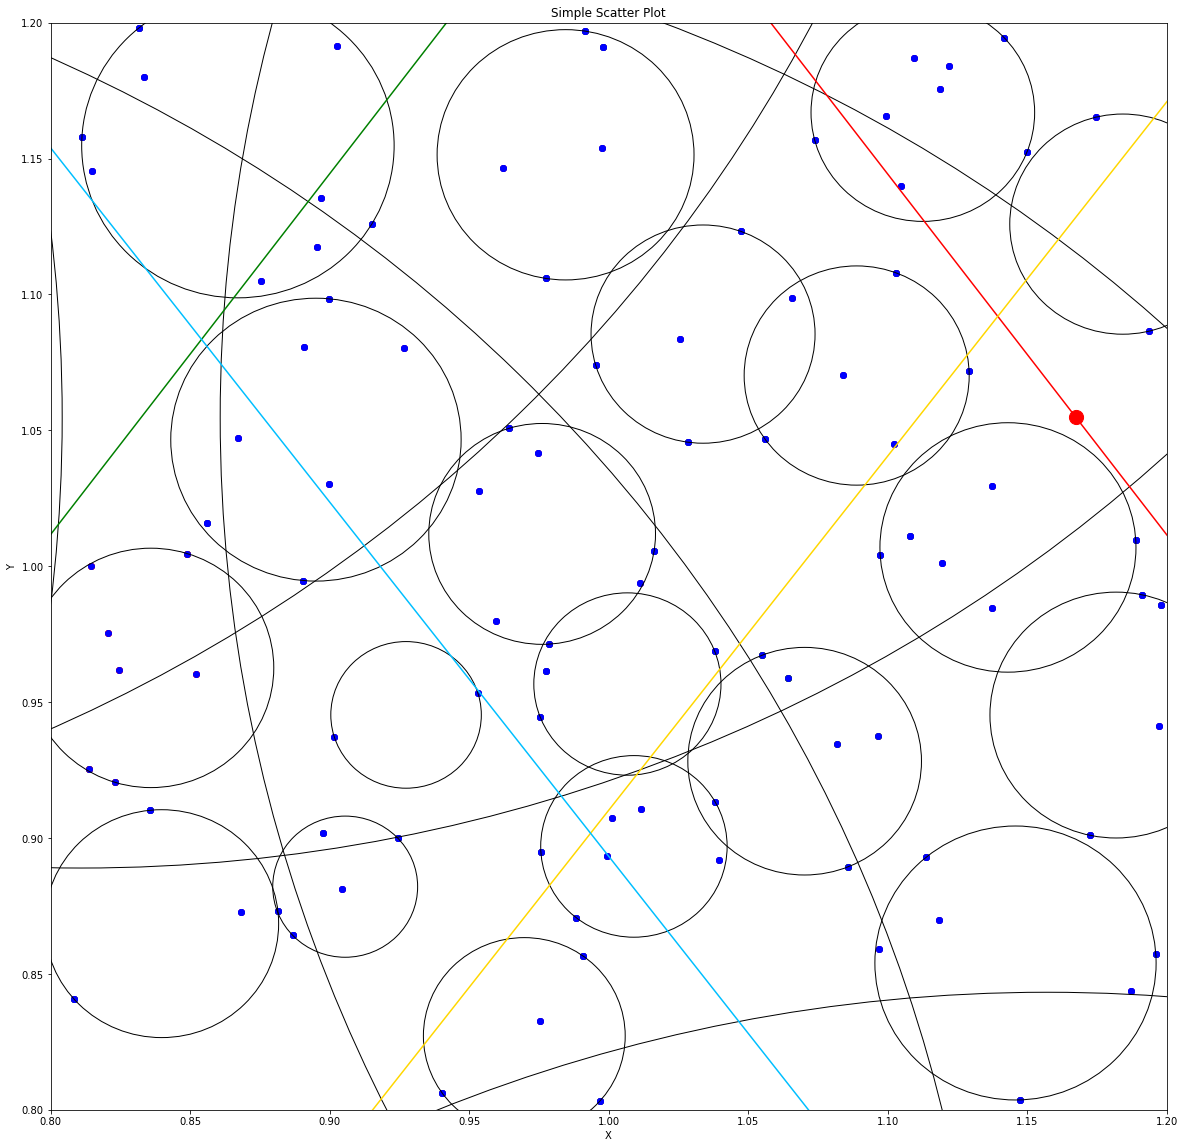

In [21]:
plt.figure(figsize=(20, 20))
# plt.style.use('classic')
plt.xlabel("X(km) * $\mathregular{10^3}$", fontsize=30)
plt.ylabel("Y(km) * $\mathregular{10^3}$", fontsize=30)

points = []
x = [random.uniform(0.8, 1.2) for _ in range(100)]
y = [random.uniform(0.8, 1.2) for _ in range(100)]
for i in range(len(x)):
    points.append((x[i], y[i]))

Clusters, BindingSets, Radiis, CurrentPoints, PointsWhichCluster = MultipleMinimaxLocation(points, 19)
points, Clusters, BindingSets, Radiis, PointsWhichCluster, CurrentPoints = rearrangement(points, Clusters, BindingSets, Radiis, PointsWhichCluster)

for i in range(len(x)):
    plt.scatter(points[i][0], points[i][1], c="b")

    
# RedLine_x, GreenLine_x, BlueLine_x, GlodLine_x = generateOrbit()
All_Center = np.zeros([NumberOfOrbit*SatellitePerOrbit*4, 2]) # 所有衛星的中心位置 # 共有 7 * 6 * 4 個衛星, (x,y)共兩軸
All_Center = Inintial_All_Center(All_Center)
# Satellites_Centers_at_time(All_Center, 10)

# 畫線
for i in range(NumberOfOrbit):
    plt.plot([RedLine_x[i][0], RedLine_x[i][-1]], [y_table[0], y_table[-1]], color='r')
    plt.plot([GreenLine_x[i][0], GreenLine_x[i][-1]], [y_table[0], y_table[-1]], color='g')
    plt.plot([BlueLine_x[i][0], BlueLine_x[i][-1]], [y_table[0], y_table[-1]], color='deepskyblue')
    plt.plot([GlodLine_x[i][0], GlodLine_x[i][-1]], [y_table[0], y_table[-1]], color='gold')
    
plt.xlim(0.8,1.2)
plt.ylim(0.8,1.2)
# linspace = np.linspace(0, 2, 3)
# plt.xticks(linspace)
# plt.yticks(linspace)

In [22]:
def ShadowedRicianRandGen(b, m, Omega, N, a):
    """
    Stochastic algorithms：Monte Carlo methods.
    
    Reference: "https://stackoverflow.com/questions/25471457/generating-random-numbers-with-a-given-probability-density-function"
    
    This function generates random number according to shadowed Rician
    density function - pdf.

    INPUTS:
           b = Scalar (real), Average power of multipath component
           m = Scalar (real), Fading severity parameter
           Omega = Scalar (real), Average power of LOS component
           N = Scalar (real) specifying number of random number to be 
                   generated
    OUTPUTS:
           X = Scalar (Column Vector if N > 1) specifying random number
               generated using Shadowed Rician distribution function
    """
    import random
    import scipy.special as sc
    
    # Implementation Starts Here
    X = np.zeros(N)
    
    # Intermediate Variables
    alpha = ((2*b*m)/(2*b*m + Omega))
    beta = Omega/(2*b*(2*b*m + Omega))
    lambda_0 = 1/(2*b)
    
    # Maximum value of Shadowed Rician value occurs at x = 0
    maxfx = (alpha**m) * lambda_0
    c = maxfx
    # Accept and Reject Algo.
    for i in range(N):
        accept = False
        while accept == False:
            U2 = random.uniform(0, c)
            U1 = random.uniform(0, a)

            fx = (alpha**m)*lambda_0*math.exp(-U1*lambda_0)*sc.hyp1f1(m, 1, beta*U1)

            if U2 <= fx:
                X[i] = U1
                accept = True
    return X

In [23]:
def calculate_channel_gain(dis, alpha_k):
    """
        Channel Coefficient: 參考來源 https://ieeexplore.ieee.org/document/9497773
        https://slideplayer.com/slide/5144285/
        Transmit Antenna Peak Gain: 參考來源 https://fcc.report/IBFS/SAT-AMD-20210818-00105/12950838
        Receiver Antenna Peak Gain: 參考來源 https://ieeexplore.ieee.org/document/9497773
        The Carrier Frequency: 19GHz, The Wave Length: 0.015789473684210527 m
    """
    WaveLength = 0.015789 # m
    TransmitAntennaPeakGain = 44.5 # dBi 
    ReceiverAntennaPeakGain = 41.7 # dBi 
    
    FSPL = 20*math.log10(0.015789 / 4 / math.pi / dis) # dB
    H = TransmitAntennaPeakGain + ReceiverAntennaPeakGain - alpha_k - 2 - ShadowedRicianRandGen(1.29, 0.158, 19.4, N, a)[0] + FSPL

In [378]:
def calculate_beam_radiation(All_Center, CurrentPoints):
    from scipy.special import jv
    """ 當 satellite i 把 beam 打向 cell j 時, 對其他 cell k 造成的干擾"""
    Off_Axis = np.zeros((len(All_Center), len(CurrentPoints), len(CurrentPoints)))
    Alpha = np.zeros_like(Off_Axis)

    for i in range(Off_Axis.shape[0]):
        for j in range(Off_Axis.shape[1]):
            # 先判斷 satellite i 是否能夠打向 cell j
            if (math.sqrt((math.pow(All_Center[i][0] - CurrentPoints[j][0], 2) + math.pow(All_Center[i][1] - CurrentPoints[j][1], 2))) > 0.575):
                # 如果打不到 cell j, 則 表示 satellite i 打不到 cellj, 更不會對 cell k 造成干擾
                Off_Axis[i][j] = 1
                continue
            for k in range(Off_Axis.shape[2]):
                dis_A = math.sqrt((math.pow(All_Center[i][0] - CurrentPoints[j][0], 2) + math.pow(All_Center[i][1] - CurrentPoints[j][1], 2)) + math.pow(0.55, 2)) # satellite i 與 cell j 的距離
                dis_B = math.sqrt((math.pow(All_Center[i][0] - CurrentPoints[k][0], 2) + math.pow(All_Center[i][1] - CurrentPoints[k][1], 2)) + math.pow(0.55, 2)) # satellite i 與 cell k 的距離
                dis_A_B = math.sqrt(math.pow(CurrentPoints[j][0] - CurrentPoints[k][0], 2) + math.pow(CurrentPoints[j][1] - CurrentPoints[k][1], 2))
                cos_C = (math.pow(dis_A, 2) + math.pow(dis_B, 2) - math.pow(dis_A_B, 2)) / 2 / dis_A / dis_B
                if cos_C > 1:
                    cos_C = 1
                off_axis = math.acos(cos_C)
                Off_Axis[i][j][k] = off_axis # rad
    for i in range(Off_Axis.shape[0]):
        for j in range(Off_Axis.shape[1]):
            for k in range(Off_Axis.shape[2]):
                if Off_Axis[i][j][k] == 1: # 打不到
                    Alpha[i][j][k] = 0
                elif Off_Axis[i][j][k] == 0: # boresight
                    Alpha[i][j][k] = 1
                else:
#                     print(Off_Axis[i][j][k] * 180 / math.pi)
                    u_variable = 2.07123 * math.sin(Off_Axis[i][j][k]) / math.sin(5 * math.pi / 180) # math三角函數 input為 rad
                    alpha = abs((jv(1, u_variable) / 2 / u_variable) + (36 * jv(3, u_variable) / math.pow(u_variable, 3)))
                    Alpha[i][j][k] = alpha
                      
    return Alpha

In [379]:
Alpha = calculate_beam_radiation(All_Center, CurrentPoints)

In [48]:
def find_available_satellite(point, second):
    Centers = copy.deepcopy(All_Center)
    Centers = Satellites_Centers_at_time(Centers, second)
    mask = np.full(All_Center.shape[0], False)
    distance = []
    for i in range(len(Centers)):
        d = math.sqrt(math.pow((point[0]-Centers[i][0]),2) + math.pow((point[1]-Centers[i][1]), 2))
        if(d < 0.5735):
            distance.append(d)
            mask[i] = True
    available_satellite_index = list(np.where(mask)[0])
    return distance, available_satellite_index

In [78]:
def access_shortest_satellite_at_time(points, second):
    """
        當每個 Group 都存取最近的衛星時：
        傳入欲計算的 points, 運算得在 second 的時刻, 回傳 points 存取最近的衛星編號
    """
    Group_access_satellite = []
    for i in range(len(points)):
        distance, available_satellite_index = find_available_satellite(points[i], second)
        Group_access_satellite.append(available_satellite_index[distance.index(min(distance))])
        
    return Group_access_satellite

def access_shortest_satellite_during_time(points, duration):
    access_table = np.zeros((duration, len(points)))
    for i in range(duration):
        access_table[i] = access_shortest_satellite_at_time(points, i)
    return access_table

# distance, available_satellite_index = find_available_satellite(CurrentPoints[0], 0)
# access_shortest_satellite_during_time(CurrentPoints, 50)

In [386]:
access_table = access_shortest_satellite_during_time(CurrentPoints, 10)
access_table

array([[87., 84., 84., 84., 84., 87., 84., 84., 84., 84., 84., 84., 84.,
        84., 84., 87., 59., 84., 87.],
       [87., 84., 84., 84., 84., 87., 84., 84., 84., 84., 84., 84., 84.,
        84., 84., 87., 59., 84., 87.],
       [87., 84., 84., 84., 84., 87., 84., 84., 84., 84., 84., 84., 84.,
        84., 84., 87., 59., 84., 87.],
       [87., 84., 84., 84., 84., 87., 84., 84., 84., 84., 84., 84., 84.,
        84., 84., 87., 59., 84., 87.],
       [87., 84., 84., 84., 84., 87., 84., 84., 84., 84., 84., 84., 84.,
        84., 84., 87., 59., 84., 87.],
       [87., 84., 84., 84., 84., 87., 87., 84., 84., 84., 84., 84., 84.,
        84., 84., 87., 59., 84., 87.],
       [87., 84., 84., 84., 84., 87., 87., 84., 84., 84., 84., 84., 84.,
        84., 84., 87., 59., 84., 87.],
       [87., 84., 84., 84., 84., 87., 87., 84., 84., 84., 84., 84., 84.,
        84., 84., 87., 59., 84., 87.],
       [87., 84., 84., 84., 84., 87., 87., 84., 84., 84., 84., 84., 84.,
        84., 84., 87., 59., 84.

In [98]:
int(access_table[0][0]) # 衛星編號
All_Center[int(access_table[0][0])] # 衛星位置

array([0.81207595, 0.66528567])

In [471]:
def calculate_throughput(access_table):

    Throughput_table = np.zeros((access_table.shape[0], access_table.shape[1]))
    PowerConsumption_table = np.zeros((access_table.shape[0], access_table.shape[1]))

    for second in range(access_table.shape[0]):
        SatellitesLocation = Satellites_Centers_at_time(All_Center, second)
        Signal = np.zeros(access_table.shape[1])
        interference = np.zeros((access_table.shape[1], access_table.shape[1]))
        for i in range(access_table.shape[1]):
            for k in range(len(CurrentPoints)):
                if i == k: # 衛星 i 照射 cell k 時
                    dis = math.sqrt(math.pow(SatellitesLocation[int(access_table[second][i])][0] - CurrentPoints[k][0], 2)+math.pow(SatellitesLocation[int(access_table[second][i])][1] - CurrentPoints[k][1], 2)+math.pow(0.55, 2))
                    off_axis = math.acos(0.55 / dis) * 180 / math.pi
                    EIRP = 0.00204 * math.pow(off_axis, 2) - 0.0066 * off_axis + 7.14 # [dBW/1MHz] # https://fcc.report/IBFS/SAT-LOA-20170726-00110/1252848
                    EIRP += 10 * math.log10(240) # [dBW/240MHz]
                    Power_t = EIRP - 44.5 # [dBW]
#                     print(Power_t)
                    dis *= 1000000 # 10**-3km
                    FSPL = 20*math.log10(0.015789 / 4 / math.pi / dis) # [dB]
                    Signal[k] = Power_t + 44.5 + 41.7 - 3.125 - ShadowedRicianRandGen(b=0.158, m=19.4, Omega=1.29, N=1, a=10)[0] + FSPL #[dBW]
                    Signal[k] /= 10
                    Signal[k] = math.pow(10, Signal[k]) # [W]
                    interference[i][k] = np.nan
                else: # 先算 interference 的 channel, 包含距離 和 off-axis
                    dis = math.sqrt(math.pow(SatellitesLocation[int(access_table[second][i])][0] - CurrentPoints[k][0], 2)+math.pow(SatellitesLocation[int(access_table[second][i])][1] - CurrentPoints[k][1], 2)+math.pow(0.55, 2))
                    dis *= 1000000 # 10**-3km
                    FSPL = 20*math.log10(0.015789 / 4 / math.pi / dis) # [dB]
                    alpha_k = Alpha[int(access_table[second][i])][i][k]

                    if alpha_k == 0.0: # 打不到
                        alpha_k = 0
                        interference[i][k] = 0
                    else:
                        alpha_k = 10*np.log10(alpha_k) # dB # 畫圖顯示應該是 10log10
#                         print(alpha_k)
                        interference[i][k] = 44.5 + 41.7 - 3.125 - ShadowedRicianRandGen(b=0.158, m=19.4, Omega=1.29, N=1, a=10)[0] + FSPL + alpha_k # [dBW]
                        
            # 獲得 Power_t後, 把 interference 轉成 W
            for k in range(len(CurrentPoints)): 
                interference[i][k] += Power_t
                interference[i][k] /= 10
                interference[i][k] = math.pow(10, interference[i][k]) # 單位 W
            
            PowerConsumption_table[second][i] = Power_t
            
        for i in range(interference.shape[0]):
            for j in range(interference.shape[1]):
                if(np.isnan(interference[i][j])):
                    interference[i][j] = 0
                    
        SUM_interference = [0 for _ in range(interference.shape[0])]
        
        for i in range(interference.shape[0]):
            for j in range(interference.shape[1]):
                SUM_interference[j] += interference[i][j]
                
        for i in range(len(Signal)):
            Throughput_table[second][i] = 240*math.log2(1+(Signal[i] / SUM_interference[i]))
            
        
                
    return Throughput_table, PowerConsumption_table

# for i in range(interference.shape[0]):
#     for j in range(interference.shape[1]):
#         if(np.isnan(interference[i][j])):
#             interference[i][j] = 0
            
# SUM_interference = [0 for _ in range(interference.shape[0])]

# for i in range(interference.shape[0]):
#     for j in range(interference.shape[1]):
#         SUM_interference[j] += interference[i][j]

In [472]:
Throughput_table, PowerConsumption_table = calculate_throughput(access_table)

for i in range(len(Throughput_table)):
     print(Throughput_table[i])

[198.58714373 163.2643153  239.23383385 183.40611682 201.85354502
 252.46949716  58.42379542 119.3992917  229.01217848 182.95875952
 440.37818451 153.78355383 130.35020554 411.58611269 232.547155
 235.46026526 420.45073506  91.66111932 146.97351473]
[211.29153209 111.79350194 297.62988222 232.65539747 323.16453614
 205.88993987  98.25820058 119.22054989 184.185311   138.75167848
 268.10905898 132.77220532 102.12649055 455.14785879 171.24009706
 109.56825924 349.03914234 184.72613571  99.17909639]
[236.42549145 122.51105396 316.86276615 132.22571277 253.28412587
 277.07886019 107.80442967 167.95595803 226.84657691 114.90211302
 452.71322909 189.88688282 110.4173137  481.01502408 241.3176602
  91.0083326  447.36954492 237.31857054 143.63618586]
[210.63089629  95.9189165  269.86055329 212.12771412 279.4313998
 331.81642705 103.59085744 119.56658085 161.64235852 136.48226211
 483.81694836 105.07222783  91.14481883 354.22908557 240.33133035
 186.95516818 452.08051638 262.77981052 163.739906

In [473]:
PowerConsumption_table

array([[-12.09226043, -13.1308445 , -12.82705494, -13.25045077,
        -13.3083952 , -12.6872156 , -12.38694517, -12.70511122,
        -13.36979236, -12.3144973 , -12.86204955, -12.90201017,
        -12.95374083, -13.49101109, -13.53126826, -12.83974016,
        -11.96258543, -13.47252717, -12.61001796],
       [-12.14852043, -13.14139469, -12.77749581, -13.22054009,
        -13.27354841, -12.74393013, -12.37237703, -12.71196919,
        -13.39507735, -12.27659134, -12.89976519, -12.87969838,
        -12.9478306 , -13.47782591, -13.53588411, -12.88572016,
        -11.91567578, -13.45567884, -12.66705614],
       [-12.20367551, -13.14987544, -12.72642131, -13.18860015,
        -13.23663397, -12.79923222, -12.35603762, -12.7168893 ,
        -13.41815674, -12.23721007, -12.93569495, -12.85547461,
        -12.93990293, -13.46245201, -13.53866337, -12.93000797,
        -11.86758317, -13.43660176, -12.72273592],
       [-12.25767345, -13.15628084, -12.67388859, -13.1546653 ,
        -13.197

In [401]:
from collections import Counter

count = Counter(access_table[0])
count

Counter({87.0: 4, 84.0: 14, 59.0: 1})

In [412]:
access_table[0]

array([87., 84., 84., 84., 84., 87., 84., 84., 84., 84., 84., 84., 84.,
       84., 84., 87., 59., 84., 87.])

In [413]:
Clusters

[[(0.8135963977618229, 0.9253793015024819),
  (0.8522246735772198, 0.9604561253567028),
  (0.8490015698179999, 1.0046491903449954),
  (0.8145321594205366, 1.0000353107806665),
  (0.8229167695906107, 0.9205181485715191),
  (0.8206136771590774, 0.975319990933704),
  (0.8244652012244031, 0.9616650452272626)],
 [(1.0964927778056184, 0.9375517744285348),
  (1.0856453049154073, 0.8893091327802982),
  (1.0644466335652771, 0.9590321861020982),
  (1.0549127708949753, 0.9672083290661393),
  (1.0820295989050557, 0.9344590903779052)],
 [(0.9981700201473284, 1.190886369285991),
  (0.9620808549536669, 1.1464082204224004),
  (0.9775189184768511, 1.1058664368094335),
  (0.9916490575753367, 1.196861832652448),
  (0.997731975695326, 1.153933506047323)],
 [(1.0473843968088632, 1.1231923317675094),
  (1.0284529485268936, 1.0456150285176495),
  (1.0255166112639365, 1.083433343870435),
  (0.9953521781756276, 1.0740514874830425)],
 [(1.0738420743149044, 1.1568902857715),
  (1.0995945063119932, 1.165790765949

In [411]:
for i in range(len(Clusters)):
    print(10*len(Clusters[i]))

70
50
50
40
80
40
20
70
40
70
60
70
30
20
60
40
90
60
40


In [429]:
# "https://ieeexplore.ieee.org/document/9693289" 文中模型 cell 的 arrival rate 從 50 Mbps 到 100 Mbps
# 那我每個 UE 的平均 arrival rate為 10Mbps
Queues = [[] for _ in range(len(Clusters))] # 共有 19 群, 每一群會有一個 queue
Queues
for i in range(len(Clusters)): # 根據每一群有幾人, 那一群的封包到達率為10*每個人 Mbps
    for bit in range(10*len(Clusters[i])):
        Queues[i].append(0)

In [432]:
for i in range(len(Clusters)):
    print(len(Queues[i]))

70
50
50
40
80
40
20
70
40
70
60
70
30
20
60
40
90
60
40
